# Generate routes

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.cluster import KMeans

In [150]:
data_stops = pd.read_csv('uni_molde_v2.csv', sep=',')

data_stops
data_stops.loc[data_stops['stop_completed_at'].isna(), 'stop_completed_at'] = "-1"
data_stops.loc[data_stops['stop_arrived_at'].isna(), 'stop_arrived_at'] = "-1"

print(data_stops.isnull().sum())


sorted_data_stops = data_stops.sort_values(by='stop_dispatched_at', ascending=True)
sorted_data_stops = sorted_data_stops.reset_index(drop=True)
sorted_data_stops['day_of_week'] = pd.to_datetime(sorted_data_stops['stop_dispatched_at']).dt.day_name()
sorted_data_stops['date'] = pd.to_datetime(sorted_data_stops['stop_dispatched_at']).dt.date

#clustering
locations_df = sorted_data_stops[['current_lat', 'current_lng']]
kmeans = KMeans(n_clusters=1000, random_state=42)
kmeans.fit(locations_df)
sorted_data_stops['cluster'] = kmeans.labels_ + 1

sorted_data_stops['location_id_craft'] = sorted_data_stops.groupby(['current_lat', 'current_lng']).ngroup()+1
with open('output.txt', 'w') as f:
    print(sorted_data_stops.to_string(), file=f)
print('number of groups', sorted_data_stops['location_id_craft'].nunique())

# data_stops_day= sorted_data_stops[sorted_data_stops['day_of_week'] == "Wednesday"]
grouped_df = sorted_data_stops.groupby('driver_workday_id')[['driver_id', 'location_type_id', 'address_id', 'stop_dispatched_at', 'stop_arrived_at', 'stop_earliest', 'stop_latest', 'current_lat', 'current_lng', 'stop_completed_at', 'cluster', 'location_id_craft','day_of_week', 'date']].apply(lambda x: pd.Series({
    'driver_id': x['driver_id'].tolist(),
    'location_type_id': x['location_type_id'].tolist(),
    'planned_route_location': x['address_id'].tolist(),
    'stop_dispatched_at': x['stop_dispatched_at'].tolist(),
    'stop_arrived_at': x['stop_arrived_at'].tolist(),
    'stop_earliest': x['stop_earliest'].tolist(),
    'stop_latest': x['stop_latest'].tolist(),
    'current_lat': x['current_lat'].tolist(),
    'current_lng': x['current_lng'].tolist(),
    'stop_completed_at': x['stop_completed_at'].tolist(),
    'planned_route_cluster': x['cluster'].tolist(),
    'planned_route_craft': x['location_id_craft'].tolist(),
    'day_of_week': x['day_of_week'].tolist(),
    'date': x['date'].tolist()
})).reset_index()
grouped_df

stop_completed_at        0
stop_arrived_at          0
stop_latest              0
stop_earliest            0
stop_dispatched_at       0
location_id              0
location_type_id         0
driver_workday_id        0
organization_id          0
address_id               0
location_is_depot        0
driver_id                0
contact_id               0
current_lat              0
current_lng              0
prev_planned_lat      7450
prev_planned_lng      7450
prev_actual_lat       7450
prev_actual_lng       7450
dtype: int64
number of groups 3110


,driver_workday_id,driver_id,location_type_id,planned_route_location,stop_dispatched_at,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,stop_completed_at,planned_route_cluster,planned_route_craft,day_of_week,date
0,297900,"[1255, 1255, 1255, 1255, 1255, 1255, 1255, 125...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 118973, 118854, 118820, 118623, 11909...","[2024-01-01 19:41:35.136881+00, 2024-01-01 19:...","[2024-01-01 22:14:16.454324+00, 2024-01-01 23:...","[2024-01-01 19:00:00+00, 2024-01-01 23:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 03:00:00+0...","[55.647, 55.667, 55.677, 55.676, 55.671, 55.66...","[12.152, 12.526, 12.566, 12.562, 12.561, 12.56...","[2024-01-01 22:14:54.872731+00, 2024-01-01 23:...","[766, 597, 919, 560, 560, 404, 811, 404, 404, ...","[886, 1060, 1171, 1160, 1098, 1057, 1078, 1065...","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0..."
1,297906,"[1195, 1195, 1195, 1195, 1195, 1195, 1195]","[1, 2, 2, 2, 2, 2, 2]","[122267, 120295, 120297, 118930, 120298, 13328...","[2024-01-01 19:42:05.147145+00, 2024-01-01 19:...","[2024-01-01 20:50:17.003744+00, 2024-01-02 02:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.647, 55.662, 55.662, 55.673, 55.662, 55.65...","[12.152, 12.361, 12.363, 12.394, 12.369, 12.36...","[2024-01-01 20:50:29.721122+00, 2024-01-02 02:...","[766, 723, 723, 263, 116, 116, 416]","[886, 1018, 1019, 1116, 1020, 989, 1051]","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0..."
2,297908,"[1176, 1176, 1176, 1176, 1176, 1176, 1176, 117...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[122267, 120515, 119217, 119215, 119170, 13445...","[2024-01-01 21:25:47.230131+00, 2024-01-01 21:...","[2024-01-01 23:06:27.627368+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.647, 55.62, 55.636, 55.632, 55.627, 55.609...","[12.152, 12.029, 12.045, 12.055, 12.097, 12.08...","[2024-01-01 23:06:36.064172+00, 2024-01-02 01:...","[766, 625, 785, 376, 506, 626, 854, 854, 854, ...","[886, 721, 790, 772, 737, 695, 970, 970, 960, ...","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0..."
3,297911,"[1197, 1197, 1197, 1197, 1197, 1197, 1197, 119...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 145327, 133259, 133259, 133259, 13325...","[2024-01-01 19:42:59.704147+00, 2024-01-01 19:...","[2024-01-02 00:09:15.241119+00, 2024-01-02 04:...","[2024-01-02 00:00:00+00, 2024-01-02 04:30:00+0...","[2024-01-02 22:00:00+00, 2024-01-02 08:00:00+0...","[55.647, 54.651, 54.666, 54.666, 54.666, 54.66...","[12.152, 11.376, 11.333, 11.333, 11.333, 11.33...","[2024-01-02 00:09:21.131516+00, 2024-01-02 04:...","[766, 188, 39, 39, 39, 39, 39, 39, 957, 188]","[886, 5, 20, 20, 20, 20, 20, 20, 10, 3]","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0..."
4,297919,"[1218, 1218, 1218, 1218, 1218, 1218, 1218, 121...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 119426, 118790, 119069, 118805, 11885...","[2024-01-01 19:46:51.16173+00, 2024-01-01 19:4...","[2024-01-01 23:05:52.039818+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.647, 55.623, 55.562, 55.638, 55.681, 55.64...","[12.152, 12.616, 12.577, 12.652, 12.605, 12.54...","[2024-01-01 23:05:58.283704+00, 2024-01-02 01:...","[766, 687, 160, 829, 386, 408, 408, 843, 348, ...","[886, 726, 624, 808, 1226, 891, 880, 678, 651,...","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7445,378095,"[1318, 1318, 1318, 1318, 1318, 1318, 1318, 131...","[1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2]","[153184, 157688, 159697, 166402, 119926, 15

In [151]:
from geopy.distance import geodesic
import pandas as pd

# Function to calculate distance between two coordinates
def calculate_distance(row):
    distances = []
    for i in range(len(row['planned_route_craft'])-1):
        coords_1 = (sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i], ['current_lat']].values[0][0],
                     sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i], ['current_lng']].values[0][0])
        coords_2 = (sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i+1], ['current_lat']].values[0][0],
                     sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i+1], ['current_lng']].values[0][0])
        distances.append(geodesic(coords_1, coords_2).miles)
    return distances
def calculate_distance_actual(row):
    distances = []
    for i in range(len(row['actual_route_location'])-1):
        coords_1 = (sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['actual_route_location'][i], ['current_lat']].values[0][0],
                     sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['actual_route_location'][i], ['current_lng']].values[0][0])
        coords_2 = (sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['actual_route_location'][i+1], ['current_lat']].values[0][0],
                     sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['actual_route_location'][i+1], ['current_lng']].values[0][0])
        distances.append(geodesic(coords_1, coords_2).miles)
    return distances

# Create a new column 'distance_route' in 'final_routes'
grouped_df['distance_route'] = grouped_df.apply(calculate_distance, axis=1)

In [152]:
grouped_df['total_distance_planned'] = grouped_df['distance_route'].apply(sum)
grouped_df

,driver_workday_id,driver_id,location_type_id,planned_route_location,stop_dispatched_at,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,stop_completed_at,planned_route_cluster,planned_route_craft,day_of_week,date,distance_route,total_distance_planned
0,297900,"[1255, 1255, 1255, 1255, 1255, 1255, 1255, 125...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 118973, 118854, 118820, 118623, 11909...","[2024-01-01 19:41:35.136881+00, 2024-01-01 19:...","[2024-01-01 22:14:16.454324+00, 2024-01-01 23:...","[2024-01-01 19:00:00+00, 2024-01-01 23:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 03:00:00+0...","[55.647, 55.667, 55.677, 55.676, 55.671, 55.66...","[12.152, 12.526, 12.566, 12.562, 12.561, 12.56...","[2024-01-01 22:14:54.872731+00, 2024-01-01 23:...","[766, 597, 919, 560, 560, 404, 811, 404, 404, ...","[886, 1060, 1171, 1160, 1098, 1057, 1078, 1065...","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[14.693059943223329, 1.7100561195423718, 0.170...",19.013368
1,297906,"[1195, 1195, 1195, 1195, 1195, 1195, 1195]","[1, 2, 2, 2, 2, 2, 2]","[122267, 120295, 120297, 118930, 120298, 13328...","[2024-01-01 19:42:05.147145+00, 2024-01-01 19:...","[2024-01-01 20:50:17.003744+00, 2024-01-02 02:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.647, 55.662, 55.662, 55.673, 55.662, 55.65...","[12.152, 12.361, 12.363, 12.394, 12.369, 12.36...","[2024-01-01 20:50:29.721122+00, 2024-01-02 02:...","[766, 723, 723, 263, 116, 116, 416]","[886, 1018, 1019, 1116, 1020, 989, 1051]","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[8.240469050783075, 0.0782134907119265, 1.4312...",12.223586
2,297908,"[1176, 1176, 1176, 1176, 1176, 1176, 1176, 117...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[122267, 120515, 119217, 119215, 119170, 13445...","[2024-01-01 21:25:47.230131+00, 2024-01-01 21:...","[2024-01-01 23:06:27.627368+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.647, 55.62, 55.636, 55.632, 55.627, 55.609...","[12.152, 12.029, 12.045, 12.055, 12.097, 12.08...","[2024-01-01 23:06:36.064172+00, 2024-01-02 01:...","[766, 625, 785, 376, 506, 626, 854, 854, 854, ...","[886, 721, 790, 772, 737, 695, 970, 970, 960, ...","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[5.163323971103205, 1.2717651170406523, 0.4792...",56.604661
3,297911,"[1197, 1197, 1197, 1197, 1197, 1197, 1197, 119...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 145327, 133259, 133259, 133259, 13325...","[2024-01-01 19:42:59.704147+00, 2024-01-01 19:...","[2024-01-02 00:09:15.241119+00, 2024-01-02 04:...","[2024-01-02 00:00:00+00, 2024-01-02 04:30:00+0...","[2024-01-02 22:00:00+00, 2024-01-02 08:00:00+0...","[55.647, 54.651, 54.666, 54.666, 54.666, 54.66...","[12.152, 11.376, 11.333, 11.333, 11.333, 11.33...","[2024-01-02 00:09:21.131516+00, 2024-01-02 04:...","[766, 188, 39, 39, 39, 39, 39, 39, 957, 188]","[886, 5, 20, 20, 20, 20, 20, 20, 10, 3]","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[75.44459145823315, 2.0124277859574424, 0.0, 0...",79.732831
4,297919,"[1218, 1218, 1218, 1218, 1218, 1218, 1218, 121...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 119426, 118790, 119069, 118805, 11885...","[2024-01-01 19:46:51.16173+00, 2024-01-01 19:4...","[2024-01-01 23:05:52.039818+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.647, 55.623, 55.562, 55.638, 55.681, 55.64...","[12.152, 12.616, 12.577, 12.652, 12.605, 12.54...","[2024-01-01 23:05:58.283704+00, 2024-01-02 01:...","[766, 687, 160, 829, 386, 408, 408, 843, 348, ...","[886, 726, 624, 808, 1226, 891, 880, 678, 651,...","[Monday, Monday, Monday, Mon

In [153]:
routes = grouped_df[grouped_df.apply(lambda row: max(row['stop_dispatched_at']) < min(row['stop_completed_at']), axis=1)]
routes = routes.reset_index(drop=True)
len(routes)

5299

In [154]:
index_routes_with_na = []
for i in range(len(routes)):
    row = routes.iloc[i]
    if "-1" in row['stop_arrived_at']:
        index_routes_with_na.append(i)
print("The number of routes where one value is NA(arrived time)", len(index_routes_with_na))
print(index_routes_with_na)
routes = routes.drop(index_routes_with_na)
routes.reset_index(drop=True)

The number of routes where one value is NA(arrived time) 15
[828, 932, 1130, 1750, 1941, 2216, 2444, 2502, 2524, 2534, 2720, 2839, 3202, 3761, 5276]


,driver_workday_id,driver_id,location_type_id,planned_route_location,stop_dispatched_at,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,stop_completed_at,planned_route_cluster,planned_route_craft,day_of_week,date,distance_route,total_distance_planned
0,297900,"[1255, 1255, 1255, 1255, 1255, 1255, 1255, 125...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 118973, 118854, 118820, 118623, 11909...","[2024-01-01 19:41:35.136881+00, 2024-01-01 19:...","[2024-01-01 22:14:16.454324+00, 2024-01-01 23:...","[2024-01-01 19:00:00+00, 2024-01-01 23:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 03:00:00+0...","[55.647, 55.667, 55.677, 55.676, 55.671, 55.66...","[12.152, 12.526, 12.566, 12.562, 12.561, 12.56...","[2024-01-01 22:14:54.872731+00, 2024-01-01 23:...","[766, 597, 919, 560, 560, 404, 811, 404, 404, ...","[886, 1060, 1171, 1160, 1098, 1057, 1078, 1065...","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[14.693059943223329, 1.7100561195423718, 0.170...",19.013368
1,297906,"[1195, 1195, 1195, 1195, 1195, 1195, 1195]","[1, 2, 2, 2, 2, 2, 2]","[122267, 120295, 120297, 118930, 120298, 13328...","[2024-01-01 19:42:05.147145+00, 2024-01-01 19:...","[2024-01-01 20:50:17.003744+00, 2024-01-02 02:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.647, 55.662, 55.662, 55.673, 55.662, 55.65...","[12.152, 12.361, 12.363, 12.394, 12.369, 12.36...","[2024-01-01 20:50:29.721122+00, 2024-01-02 02:...","[766, 723, 723, 263, 116, 116, 416]","[886, 1018, 1019, 1116, 1020, 989, 1051]","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[8.240469050783075, 0.0782134907119265, 1.4312...",12.223586
2,297911,"[1197, 1197, 1197, 1197, 1197, 1197, 1197, 119...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 145327, 133259, 133259, 133259, 13325...","[2024-01-01 19:42:59.704147+00, 2024-01-01 19:...","[2024-01-02 00:09:15.241119+00, 2024-01-02 04:...","[2024-01-02 00:00:00+00, 2024-01-02 04:30:00+0...","[2024-01-02 22:00:00+00, 2024-01-02 08:00:00+0...","[55.647, 54.651, 54.666, 54.666, 54.666, 54.66...","[12.152, 11.376, 11.333, 11.333, 11.333, 11.33...","[2024-01-02 00:09:21.131516+00, 2024-01-02 04:...","[766, 188, 39, 39, 39, 39, 39, 39, 957, 188]","[886, 5, 20, 20, 20, 20, 20, 20, 10, 3]","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[75.44459145823315, 2.0124277859574424, 0.0, 0...",79.732831
3,297919,"[1218, 1218, 1218, 1218, 1218, 1218, 1218, 121...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 119426, 118790, 119069, 118805, 11885...","[2024-01-01 19:46:51.16173+00, 2024-01-01 19:4...","[2024-01-01 23:05:52.039818+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.647, 55.623, 55.562, 55.638, 55.681, 55.64...","[12.152, 12.616, 12.577, 12.652, 12.605, 12.54...","[2024-01-01 23:05:58.283704+00, 2024-01-02 01:...","[766, 687, 160, 829, 386, 408, 408, 843, 348, ...","[886, 726, 624, 808, 1226, 891, 880, 678, 651,...","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[18.233734262602088, 4.488050072595194, 6.0227...",54.421697
4,297922,"[1192, 1192, 1192, 1192, 1192, 1192, 1192, 119...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 119416, 119195, 119179, 119149, 11918...","[2024-01-01 19:36:39.7416+00, 2024-01-01 19:36...","[2024-01-01 23:00:15.671794+00, 2024-01-01 23:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.647, 55.646, 55.653, 55.655, 55.649, 55.64...","[12.152, 12.119, 12.126, 12.093, 12.07, 12.071...","[2024-01-01 23:00:27.463553+00, 2024-01-01 23:...","[766, 549, 173, 628, 495, 495, 495, 268, 268, ...","[886, 876, 952, 969, 906, 907, 874, 833, 814, ...","[Monday, Monday, Monday, Monday,

In [155]:
#check if it is the same driver in the route
for i in routes['driver_id']:
    if not all(x == i[0] for x in i):
            print('Not the same driver in the route')
routes['driver_id'] = routes['driver_id'].apply(lambda x : x[0])

routes['day_of_week'] = routes['day_of_week'].apply(lambda x : x[0])
routes['date'] = routes['date'].apply(lambda x : x[0])

routes['date'] = pd.to_datetime(routes['date'])
routes['last_two_weeks_count'] = routes.apply(lambda row:
                                      routes[(routes['driver_id'] == row['driver_id']) &
                                         (row['date'] - routes['date']).dt.days.between(-14, 0)].shape[0],
                                      axis=1)
routes = routes[(routes['date'] < '2024-01-01') | (routes['date'] > '2024-01-14')]

In [156]:
routes = routes.reset_index(drop=True)

In [157]:
def create_actual_route(df, column):
    res_col = []
    for i in range(len(df)):
        row = df.iloc[i]
        sorted_dates = sorted(row['stop_arrived_at'])
        mapping = {}
        for i, date in enumerate(sorted_dates):
            mapping[date] = row[column][i]
        res_val = [mapping[row['stop_arrived_at'][i]] for i in range(len(row['stop_arrived_at']))]
        res_col.append(res_val)
    return res_col

routes['actual_route_location'] = create_actual_route(routes, 'planned_route_craft')
routes['distance_actual_route'] = routes.apply(calculate_distance_actual, axis=1)
routes['total_distance_actual'] = routes['distance_actual_route'].apply(sum)
routes['difference_distance'] = routes['total_distance_actual'] - routes['total_distance_planned']
routes

,driver_workday_id,driver_id,location_type_id,planned_route_location,stop_dispatched_at,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,...,planned_route_craft,day_of_week,date,distance_route,total_distance_planned,last_two_weeks_count,actual_route_location,distance_actual_route,total_distance_actual,difference_distance
0,305735,1255,"[1, 2, 2, 2, 2, 2, 2, 2]","[153184, 118973, 118820, 119089, 118814, 11909...","[2024-01-15 20:13:10.25734+00, 2024-01-15 20:1...","[2024-01-15 22:11:49.528537+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 23:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 03:00:00+0...","[55.646, 55.667, 55.676, 55.667, 55.666, 55.66...","[12.154, 12.526, 12.562, 12.567, 12.565, 12.56...",...,"[878, 1060, 1160, 1065, 1057, 1057, 1078, 965]",Monday,2024-01-15,"[14.622082174286605, 1.5390669065648581, 0.652...",18.629012,8,"[878, 1060, 1160, 1065, 1057, 1057, 1078, 965]","[14.622082174286605, 1.5390669065648581, 0.652...",18.629012,0.000000
1,305741,1195,"[1, 2, 2, 2, 2, 2, 2, 2]","[153184, 120295, 133280, 120297, 118930, 11893...","[2024-01-15 20:14:10.430711+00, 2024-01-15 20:...","[2024-01-15 22:58:58.038139+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.646, 55.662, 55.658, 55.662, 55.673, 55.67...","[12.154, 12.361, 12.369, 12.363, 12.394, 12.39...",...,"[878, 1018, 989, 1019, 1116, 1116, 1198, 1051]",Monday,2024-01-15,"[8.172054329806356, 0.4176879391889399, 0.3628...",12.811467,11,"[878, 989, 1019, 1018, 1116, 1116, 1198, 1051]","[8.450964216125612, 0.36281868328018735, 0.078...",12.817712,0.006245
2,305742,1186,"[1, 2, 2, 2, 2, 2, 2]","[153184, 118945, 119107, 119964, 126319, 12031...","[2024-01-15 20:15:12.147596+00, 2024-01-15 20:...","[2024-01-15 22:32:42.615543+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.646, 55.75, 55.801, 55.779, 55.766, 55.858...","[12.154, 12.587, 12.526, 12.524, 12.504, 12.39...",...,"[878, 1567, 1706, 1660, 1613, 1857, 1777]",Monday,2024-01-15,"[18.384015293331288, 4.255179313348523, 1.5240...",34.421219,9,"[878, 1567, 1660, 1706, 1613, 1777, 1857]","[18.384015293331288, 3.1722833890622435, 1.524...",33.475168,-0.946051
3,305754,1218,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[153184, 118858, 119855, 118805, 119069, 11879...","[2024-01-15 20:17:12.871538+00, 2024-01-15 20:...","[2024-01-15 22:37:07.860851+00, 2024-01-16 00:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.646, 55.647, 55.672, 55.681, 55.638, 55.56...","[12.154, 12.54, 12.589, 12.605, 12.652, 12.577...",...,"[878, 891, 1114, 1226, 808, 624, 726, 706, 628...",Monday,2024-01-15,"[15.101307234678234, 2.581403110353377, 0.8825...",53.809249,11,"[878, 808, 706, 628, 724, 726, 624, 1226, 1114...","[19.492904560990247, 11.173023671235025, 5.212...",77.254641,23.445392
4,305758,1192,"[1, 2, 2, 2, 2, 2, 2, 2, 2]","[153184, 118509, 144815, 119179, 118785, 11928...","[2024-01-15 20:17:36.851051+00, 2024-01-15 20:...","[2024-01-15 23:06:33.822316+00, 2024-01-16 01:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.646, 55.64, 55.639, 55.655, 55.641, 55.64,...","[12.154, 12.091, 12.063, 12.093, 12.08, 12.088...",...,"[878, 828, 810, 969, 836, 825, 638, 952, 996]",Monday,2024-01-15,"[2.4996231048871693, 1.097798850741114, 1.6132...",18.431167,11,"[878, 825, 996, 969, 952, 638, 836, 810, 828]","[2.6154431091709953, 2.6221559539119417, 2.091...",21.401272,2.970105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4735,378091,1183,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[153184, 118722, 118722, 118949, 118837, 11938...","[2024-04-27 02:07:20.988692+00, 2024-04-27 02:...","[2024-04-27 02:10:30.983858+00, 2024-04-27 02:...","[2024-04-26 23:00:00+00, 2024-04-27 03:00:00+0...","[2024-04

In [160]:
planned_routes = routes[['planned_route_craft', 'actual_route_location', 'driver_id', 'day_of_week', 'last_two_weeks_count', 'location_type_id', 'stop_arrived_at', 'stop_earliest', 'stop_latest', 'current_lat', 'current_lng', 'difference_distance', 'distance_route']]
actual_routes = routes['actual_route_location']

In [161]:
planned_routes_list = planned_routes['planned_route_craft'].tolist()
actual_routes_list = actual_routes.tolist()

# filtered_rows = []
#
# for row in actual_routes_list:
#     if row not in planned_routes_list:
#         filtered_rows.append(row)

#duplicated removed
# planned_routes_list = [array for i, array in enumerate(planned_routes_list) if array not in planned_routes_list[:i]]
# actual_routes_list = [array for i, array in enumerate(filtered_rows) if array not in filtered_rows[:i]]
len(planned_routes_list),len(actual_routes_list)

(4740, 4740)

In [168]:
planned_routes

,planned_route_craft,actual_route_location,driver_id,day_of_week,last_two_weeks_count,location_type_id,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,difference_distance,distance_route
0,"[878, 1060, 1160, 1065, 1057, 1057, 1078, 965]","[878, 1060, 1160, 1065, 1057, 1057, 1078, 965]",1255,Monday,8,"[1, 2, 2, 2, 2, 2, 2, 2]","[2024-01-15 22:11:49.528537+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 23:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 03:00:00+0...","[55.646, 55.667, 55.676, 55.667, 55.666, 55.66...","[12.154, 12.526, 12.562, 12.567, 12.565, 12.56...",0.000000,"[14.622082174286605, 1.5390669065648581, 0.652..."
1,"[878, 1018, 989, 1019, 1116, 1116, 1198, 1051]","[878, 989, 1019, 1018, 1116, 1116, 1198, 1051]",1195,Monday,11,"[1, 2, 2, 2, 2, 2, 2, 2]","[2024-01-15 22:58:58.038139+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.646, 55.662, 55.658, 55.662, 55.673, 55.67...","[12.154, 12.361, 12.369, 12.363, 12.394, 12.39...",0.006245,"[8.172054329806356, 0.4176879391889399, 0.3628..."
2,"[878, 1567, 1706, 1660, 1613, 1857, 1777]","[878, 1567, 1660, 1706, 1613, 1777, 1857]",1186,Monday,9,"[1, 2, 2, 2, 2, 2, 2]","[2024-01-15 22:32:42.615543+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.646, 55.75, 55.801, 55.779, 55.766, 55.858...","[12.154, 12.587, 12.526, 12.524, 12.504, 12.39...",-0.946051,"[18.384015293331288, 4.255179313348523, 1.5240..."
3,"[878, 891, 1114, 1226, 808, 624, 726, 706, 628...","[878, 808, 706, 628, 724, 726, 624, 1226, 1114...",1218,Monday,11,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[2024-01-15 22:37:07.860851+00, 2024-01-16 00:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.646, 55.647, 55.672, 55.681, 55.638, 55.56...","[12.154, 12.54, 12.589, 12.605, 12.652, 12.577...",23.445392,"[15.101307234678234, 2.581403110353377, 0.8825..."
4,"[878, 828, 810, 969, 836, 825, 638, 952, 996]","[878, 825, 996, 969, 952, 638, 836, 810, 828]",1192,Monday,11,"[1, 2, 2, 2, 2, 2, 2, 2, 2]","[2024-01-15 23:06:33.822316+00, 2024-01-16 01:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.646, 55.64, 55.639, 55.655, 55.641, 55.64,...","[12.154, 12.091, 12.063, 12.093, 12.08, 12.088...",2.970105,"[2.4996231048871693, 1.097798850741114, 1.6132..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4735,"[878, 1725, 1725, 1559, 1964, 2152, 2199, 2241...","[878, 1725, 1725, 1559, 1964, 2241, 1991, 1992...",1183,Saturday,1,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[2024-04-27 02:10:30.983858+00, 2024-04-27 02:...","[2024-04-26 23:00:00+00, 2024-04-27 03:00:00+0...","[2024-04-27 21:00:00+00, 2024-04-27 11:00:00+0...","[55.646, 55.814, 55.814, 55.748, 55.885, 55.97...","[12.154, 12.377, 12.377, 12.541, 12.547, 12.53...",8.015057,"[14.521394423690122, 0.0, 7.856982180923998, 9..."
4736,"[878, 172, 175, 175, 174, 162, 173, 177, 157, ...","[878, 175, 162, 174, 175, 177, 170, 173, 157, ...",1217,Saturday,1,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[2024-04-27 02:24:44.395503+00, 2024-04-27 05:...","[2024-04-26 23:00:00+00, 2024-04-27 05:00:00+0...","[2024-04-27 21:00:00+00, 2024-04-27 06:30:00+0...","[55.646, 54.982, 54.983, 54.983, 54.983, 54.95...","[12.154, 12.283, 12.284, 12.284, 12.283, 12.46...",38.718922,"[46.214479514984745, 0.07979642559311469, 0.0,..."
4737,"[878, 1348, 1316, 1248, 1201, 1366, 1300, 1465...","[878, 1348, 1316, 1248, 1201, 1366, 1300, 1465...",1504,Saturday,1,"[1, 2, 2, 2, 2, 2, 2, 2, 2]","[2024-04-27 11:31:06.496202+00, 2024-04-27 11:...","[2024-04-26 23:00:00+00, 2024-04-27 05:00:00+0...","[2024-04-27 21:00:00+00, 2024-04-27 08:00:00+0...","[55.646, 55.706, 55.698, 55.683, 55.679, 55.70...","[12.154, 12.589, 12.594, 12.589, 12.534, 12.59...",0.000000,"[17.504593632711202, 0.5869090421337072, 

# Edit distance

In [169]:
# Edit Distance

def minDistance(word1, word2) -> int:
    m = len(word1)
    n = len(word2)
    # dp[i][j] := min # Of operations to convert word1[0..i) to word2[0..j)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
      dp[i][0] = i

    for j in range(1, n + 1):
      dp[0][j] = j

    for i in range(1, m + 1):
      for j in range(1, n + 1):
        if word1[i - 1] == word2[j - 1]:
          dp[i][j] = dp[i - 1][j - 1]
        else:
          dp[i][j] = min(dp[i - 1][j - 1], dp[i - 1][j], dp[i][j - 1]) + 1

    return dp[m][n]

print(minDistance([878, 1526, 1613, 1706, 1857, 1777], [878, 1526, 1706, 1613, 1777, 1857]))

3


# Route quality score

In [170]:
def calculate_route_quality_score(planned_ranks, actual_ranks):
    # Calculate sum of absolute differences in ranks
    sum_of_differences = sum(abs(actual_ranks.index(x) - planned_ranks.index(x)) for x in planned_ranks)

    # Calculate max possible difference
    max_possible_difference = sum([abs(2 * i - (len(planned_ranks) + 1)) for i in range(1, len(planned_ranks) + 1)])

    # Calculate route quality score
    route_quality_score = 1 - (sum_of_differences / max_possible_difference)

    return route_quality_score

For each driver-day, we consider only the planned route. For each planned route we calculate how much it deviates from the actual route (e.g., use some form of edit distance - see https://link.springer.com/article/10.1007/s10732-006-9001-3?), which is then normalized (divide by max edit distance, or number of visits or something?) to the interval [0, 1]. Then, a planned route is good if this distance (between planned and actual) is less than a certain threshold and otherwise it is bad. This becomes the label (bad/good)

In [205]:
import statistics
completed_routes_df = pd.DataFrame(columns=['planned_route_craft', 'actual_route_location', 'driver_id', 'day_of_week', 'last_two_weeks_count', 'location_type_id', 'stop_arrived_at', 'stop_earliest', 'stop_latest', 'current_lat', 'current_lng', 'edit_distance', 'score'])
uncompleted_routes_df = pd.DataFrame(columns=['planned_route_craft', 'actual_route_location', 'driver_id', 'day_of_week', 'distance_route', 'last_two_weeks_count', 'location_type_id', 'stop_arrived_at', 'stop_earliest', 'stop_latest', 'current_lat', 'current_lng', 'edit_distance', 'score'])
#11700795

for i in range(len(planned_routes_list)):
    editDistance = minDistance(planned_routes_list[i],actual_routes_list[i])/len(planned_routes_list[i])
    score = calculate_route_quality_score(planned_routes_list[i],actual_routes_list[i])
    # planned_routes['difference_distance'].iloc[i] > 1
    if score < 0.85 and editDistance > 0.25:
        uncompleted_routes_df = pd.concat([uncompleted_routes_df, pd.DataFrame([planned_routes.iloc[i]]).reset_index(drop=True)], ignore_index=True)
    else:
        completed_routes_df = pd.concat([completed_routes_df, pd.DataFrame([planned_routes.iloc[i]]).reset_index(drop=True)], ignore_index=True)

# uncompleted_routes_df.to_csv('uncompleted_routes_df.txt', index=False)

print(len(completed_routes_df), len(uncompleted_routes_df))
completed_routes_df

2045 2695


,planned_route_craft,actual_route_location,driver_id,day_of_week,last_two_weeks_count,location_type_id,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,edit_distance,score,difference_distance,distance_route
0,"[878, 1060, 1160, 1065, 1057, 1057, 1078, 965]","[878, 1060, 1160, 1065, 1057, 1057, 1078, 965]",1255,Monday,8,"[1, 2, 2, 2, 2, 2, 2, 2]","[2024-01-15 22:11:49.528537+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 23:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 03:00:00+0...","[55.646, 55.667, 55.676, 55.667, 55.666, 55.66...","[12.154, 12.526, 12.562, 12.567, 12.565, 12.56...",NaN,NaN,0.000000,"[14.622082174286605, 1.5390669065648581, 0.652..."
1,"[878, 1018, 989, 1019, 1116, 1116, 1198, 1051]","[878, 989, 1019, 1018, 1116, 1116, 1198, 1051]",1195,Monday,11,"[1, 2, 2, 2, 2, 2, 2, 2]","[2024-01-15 22:58:58.038139+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.646, 55.662, 55.658, 55.662, 55.673, 55.67...","[12.154, 12.361, 12.369, 12.363, 12.394, 12.39...",NaN,NaN,0.006245,"[8.172054329806356, 0.4176879391889399, 0.3628..."
2,"[878, 708]","[878, 708]",1197,Tuesday,2,"[1, 2]","[2024-01-16 23:45:30.836829+00, 2024-01-17 01:...","[2024-01-16 19:00:00+00, 2024-01-16 21:00:00+00]","[2024-01-17 01:00:00+00, 2024-01-17 04:00:00+00]","[55.646, 55.613]","[12.154, 12.493]",NaN,NaN,0.000000,[13.46312743323789]
3,"[878, 438, 878, 407, 372, 363, 352, 317, 156, ...","[878, 878, 438, 407, 372, 363, 352, 317, 156, ...",1184,Monday,8,"[1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[2024-01-15 02:30:31.162054+00, 2024-01-15 03:...","[2024-01-15 00:00:00+00, 2024-01-15 02:00:00+0...","[2024-01-15 05:00:00+00, 2024-01-15 05:00:00+0...","[55.646, 55.326, 55.646, 55.257, 55.217, 55.21...","[12.154, 11.956, 12.154, 12.123, 12.159, 12.07...",NaN,NaN,-45.885367,"[23.4637946639774, 23.4637946639774, 26.937977..."
4,"[878, 1060, 1098, 1160, 1065, 1057, 1057, 1078...","[878, 1060, 1098, 1160, 1065, 1057, 1057, 1078...",1255,Tuesday,7,"[1, 2, 2, 2, 2, 2, 2, 2, 2]","[2024-01-16 22:24:33.871644+00, 2024-01-16 23:...","[2024-01-16 19:00:00+00, 2024-01-16 23:00:00+0...","[2024-01-17 01:00:00+00, 2024-01-17 03:00:00+0...","[55.646, 55.667, 55.671, 55.676, 55.667, 55.66...","[12.154, 12.526, 12.561, 12.562, 12.567, 12.56...",NaN,NaN,0.000000,"[14.622082174286605, 1.3961896890494718, 0.348..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040,"[2294, 1405, 1409, 1410, 1415, 1854, 1799, 185...","[2294, 1405, 1409, 1410, 1415, 1854, 1799, 185...",1554,Friday,1,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[2024-04-27 04:29:26.153347+00, 2024-04-27 05:...","[2024-04-27 00:00:00+00, 2024-04-27 04:00:00+0...","[2024-04-27 16:00:00+00, 2024-04-27 12:00:00+0...","[56.067, 55.714, 55.714, 55.714, 55.715, 55.85...","[9.987, 9.999, 10.015, 10.016, 10.018, 9.817, ...",NaN,NaN,-0.038906,"[24.42618410322778, 0.6248781545034132, 0.0390..."
2041,"[2294, 2294, 2607, 2860, 3027, 3027, 3070, 306...","[2294, 2294, 2607, 2860, 3027, 3027, 3070, 306...",1529,Friday,1,"[1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[2024-04-27 04:30:59.847976+00, 2024-04-27 04:...","[2024-04-27 00:00:00+00, 2024-04-27 00:00:00+0...","[2024-04-27 16:00:00+00, 2024-04-27 16:00:00+0...","[56.067, 56.067, 56.15, 56.213, 56.431, 56.431...","[9.987, 9.987, 9.96, 10.016, 10.047, 10.047, 1...",NaN,NaN,1.093354,"[0.0, 5.836523945209148, 4.864996252026208, 15..."
2042,"[878, 624, 1120, 808, 1358, 1358]","[878, 624, 1120, 808, 1358, 1358]",1575,Saturday,1,"[1, 2, 2, 2, 2, 2]","[2024-04-27 02:47:10.787925+00, 2024-04-27 04:...","[2024-04-26 18:00:00+00, 2024-04-27 03:00:00+0...","[2024-04-27 21:00:00+00, 2024-04-27 10:00:00+0...","[55.646, 55.562, 55.673, 55.638, 55.707, 55.707]","[12.154, 12.577, 12.564, 12.652, 12.601, 12.601]",NaN,NaN,0.000000,"[17.556207721746468, 7.695858870753989, 4.2083..."
2043,"[878, 1348, 1316, 1248, 1201, 1366, 1300, 1465...","[878,

In [206]:
drivers_dic = {}
k = 1
for driver in completed_routes_df['driver_id']:
    if driver not in drivers_dic:
        drivers_dic[driver] = k
        k += 1
print('Total number of drivers', len(drivers_dic))
total_drivers = len(drivers_dic)
encoding_drivers = []
for driver in completed_routes_df['driver_id']:
    encoding_drivers.append(drivers_dic[driver])
#
completed_routes_df['driver_id_sorted'] = encoding_drivers
# final_routes = pd.concat([final_routes, pd.get_dummies(final_routes['driver_id_sorted'], prefix='encoding_drivers')], axis=1)
completed_routes_df

Total number of drivers 183


,planned_route_craft,actual_route_location,driver_id,day_of_week,last_two_weeks_count,location_type_id,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,edit_distance,score,difference_distance,distance_route,driver_id_sorted
0,"[878, 1060, 1160, 1065, 1057, 1057, 1078, 965]","[878, 1060, 1160, 1065, 1057, 1057, 1078, 965]",1255,Monday,8,"[1, 2, 2, 2, 2, 2, 2, 2]","[2024-01-15 22:11:49.528537+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 23:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 03:00:00+0...","[55.646, 55.667, 55.676, 55.667, 55.666, 55.66...","[12.154, 12.526, 12.562, 12.567, 12.565, 12.56...",NaN,NaN,0.000000,"[14.622082174286605, 1.5390669065648581, 0.652...",1
1,"[878, 1018, 989, 1019, 1116, 1116, 1198, 1051]","[878, 989, 1019, 1018, 1116, 1116, 1198, 1051]",1195,Monday,11,"[1, 2, 2, 2, 2, 2, 2, 2]","[2024-01-15 22:58:58.038139+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.646, 55.662, 55.658, 55.662, 55.673, 55.67...","[12.154, 12.361, 12.369, 12.363, 12.394, 12.39...",NaN,NaN,0.006245,"[8.172054329806356, 0.4176879391889399, 0.3628...",2
2,"[878, 708]","[878, 708]",1197,Tuesday,2,"[1, 2]","[2024-01-16 23:45:30.836829+00, 2024-01-17 01:...","[2024-01-16 19:00:00+00, 2024-01-16 21:00:00+00]","[2024-01-17 01:00:00+00, 2024-01-17 04:00:00+00]","[55.646, 55.613]","[12.154, 12.493]",NaN,NaN,0.000000,[13.46312743323789],3
3,"[878, 438, 878, 407, 372, 363, 352, 317, 156, ...","[878, 878, 438, 407, 372, 363, 352, 317, 156, ...",1184,Monday,8,"[1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[2024-01-15 02:30:31.162054+00, 2024-01-15 03:...","[2024-01-15 00:00:00+00, 2024-01-15 02:00:00+0...","[2024-01-15 05:00:00+00, 2024-01-15 05:00:00+0...","[55.646, 55.326, 55.646, 55.257, 55.217, 55.21...","[12.154, 11.956, 12.154, 12.123, 12.159, 12.07...",NaN,NaN,-45.885367,"[23.4637946639774, 23.4637946639774, 26.937977...",4
4,"[878, 1060, 1098, 1160, 1065, 1057, 1057, 1078...","[878, 1060, 1098, 1160, 1065, 1057, 1057, 1078...",1255,Tuesday,7,"[1, 2, 2, 2, 2, 2, 2, 2, 2]","[2024-01-16 22:24:33.871644+00, 2024-01-16 23:...","[2024-01-16 19:00:00+00, 2024-01-16 23:00:00+0...","[2024-01-17 01:00:00+00, 2024-01-17 03:00:00+0...","[55.646, 55.667, 55.671, 55.676, 55.667, 55.66...","[12.154, 12.526, 12.561, 12.562, 12.567, 12.56...",NaN,NaN,0.000000,"[14.622082174286605, 1.3961896890494718, 0.348...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040,"[2294, 1405, 1409, 1410, 1415, 1854, 1799, 185...","[2294, 1405, 1409, 1410, 1415, 1854, 1799, 185...",1554,Friday,1,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[2024-04-27 04:29:26.153347+00, 2024-04-27 05:...","[2024-04-27 00:00:00+00, 2024-04-27 04:00:00+0...","[2024-04-27 16:00:00+00, 2024-04-27 12:00:00+0...","[56.067, 55.714, 55.714, 55.714, 55.715, 55.85...","[9.987, 9.999, 10.015, 10.016, 10.018, 9.817, ...",NaN,NaN,-0.038906,"[24.42618410322778, 0.6248781545034132, 0.0390...",127
2041,"[2294, 2294, 2607, 2860, 3027, 3027, 3070, 306...","[2294, 2294, 2607, 2860, 3027, 3027, 3070, 306...",1529,Friday,1,"[1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[2024-04-27 04:30:59.847976+00, 2024-04-27 04:...","[2024-04-27 00:00:00+00, 2024-04-27 00:00:00+0...","[2024-04-27 16:00:00+00, 2024-04-27 16:00:00+0...","[56.067, 56.067, 56.15, 56.213, 56.431, 56.431...","[9.987, 9.987, 9.96, 10.016, 10.047, 10.047, 1...",NaN,NaN,1.093354,"[0.0, 5.836523945209148, 4.864996252026208, 15...",108
2042,"[878, 624, 1120, 808, 1358, 1358]","[878, 624, 1120, 808, 1358, 1358]",1575,Saturday,1,"[1, 2, 2, 2, 2, 2]","[2024-04-27 02:47:10.787925+00, 2024-04-27 04:...","[2024-04-26 18:00:00+00, 2024-04-27 03:00:00+0...","[2024-04-27 21:00:00+00, 2024-04-27 10:00:00+0...","[55.646, 55.562, 55.673, 55.638, 55.707, 55.707]","[12.154, 12.577, 12.564, 12.652, 12.601, 12.601]",NaN,NaN,0.000000,"[17.556207721746468, 7.695858870753989, 4.2083...",110
2043,"[878, 1348, 13

/var/folders/0j/mpbqwzf51p38zw2w423xp1fw0000gn/T/ipykernel_18976/2925088267.py:3: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(completed_routes_df["score"], kernel="gau")
/var/folders/0j/mpbqwzf51p38zw2w423xp1fw0000gn/T/ipykernel_18976/2925088267.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(completed_routes_df["score"], kernel="gau")


<Axes: xlabel='score', ylabel='Density'>

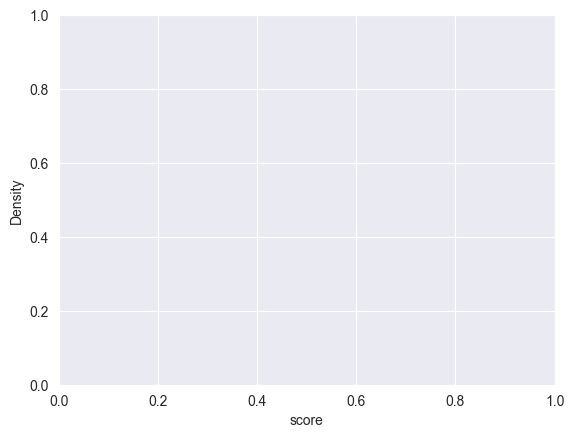

In [207]:
import seaborn as sns
# sns.ecdfplot(completed_routes_df["score"])
sns.kdeplot(completed_routes_df["score"], kernel="gau")
# plt.hist(completed_routes_df["score"], bins=80)

/Users/anko/opt/anaconda3/envs/RealDataClassificator/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/anko/opt/anaconda3/envs/RealDataClassificator/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


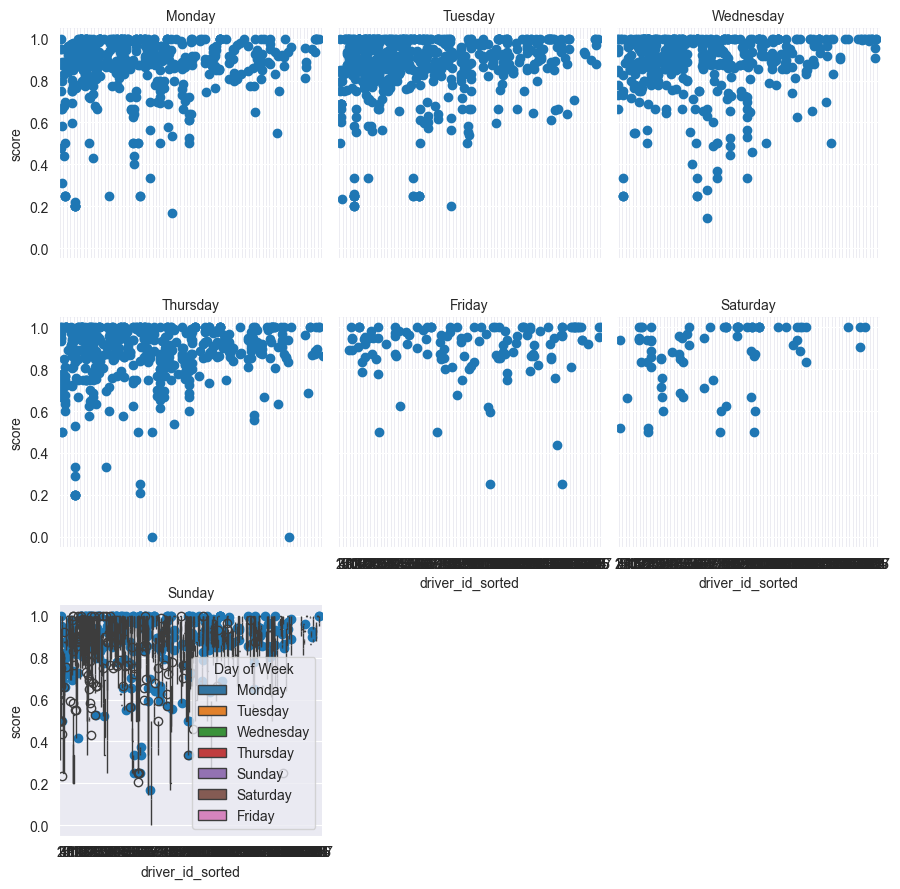

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a Pandas DataFrame called 'df'

# Faceted scatter plot
sns.FacetGrid(completed_routes_df, col="day_of_week", col_wrap=3) \
    .map(plt.scatter, "driver_id_sorted", "score") \
    .set_titles("{col_name}")

# Box plot with hue
sns.boxplot(x="driver_id_sorted", y="score", hue="day_of_week", data=completed_routes_df)
plt.legend(title="Day of Week")

In [46]:
!pip install statsmodels

In [47]:
import pandas as pd
from scipy.stats import pearsonr
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Correlation analysis
for day in completed_routes_df["day_of_week"].unique():
    day_df = completed_routes_df[completed_routes_df["day_of_week"] == day]
    corr_coef, p_value = pearsonr(day_df["driver_id_sorted"], day_df["score"])
    print(f"Day: {day}, Correlation Coefficient: {corr_coef:.2f}, p-value: {p_value:.2f}")

# ANOVA
formula = "score ~ C(driver_id_sorted) + C(day_of_week)"
model = ols(formula, data=completed_routes_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

Day: Monday, Correlation Coefficient: 0.15, p-value: 0.00
Day: Tuesday, Correlation Coefficient: 0.15, p-value: 0.00
Day: Wednesday, Correlation Coefficient: 0.09, p-value: 0.03
Day: Thursday, Correlation Coefficient: 0.16, p-value: 0.00
Day: Friday, Correlation Coefficient: 0.01, p-value: 0.87
Day: Saturday, Correlation Coefficient: 0.31, p-value: 0.00
Day: Sunday, Correlation Coefficient: 0.12, p-value: 0.02
                        sum_sq      df          F         PR(>F)
C(driver_id_sorted)  26.969912   186.0  10.094634  1.688107e-193
C(day_of_week)        0.043824     6.0   0.508492   8.023513e-01
Residual             35.364218  2462.0        NaN            NaN


In [48]:
sunday_count = completed_routes_df[completed_routes_df["day_of_week"] == "Sunday"].shape[0]
print(f"Number of rows on Sunday: {sunday_count}")

Number of rows on Sunday: 369


In [49]:
import folium
def build_route(lat_seq, lon_seq, color, earliest, latest, arrived, location_type_id, file_name, marker_bool = False):
    m = folium.Map(location=[lat_seq[0], lon_seq[0]], zoom_start=13)
    # Add a polyline with arrows
    offset = 0
    for i in range(len(lat_seq)):
        lat, lon = lat_seq[i], lon_seq[i]
        earliest_date = earliest[i]
        latest_date = latest[i]
        arrived_date = arrived[i]
        location_type = location_type_id[i]

        # Determine the marker color based on the arrived date being within the earliest and latest date range
        if marker_bool == False:
            marker_color = 'white'
        else:
            if earliest_date <= arrived_date <= latest_date:
                marker_color = 'green'
            else:
                marker_color = 'red'

        # Add an index label
        folium.Marker([lat + offset * 0.000001, lon + offset * 0.000001], icon=folium.DivIcon(html=f'<div style="font-size: 13pt; border: 1px solid white; border-radius: 50%; width: 1.2em; height: 1.2em; background-color: {marker_color}; border-radius: 50%;text-align: center;text-color: white;">{i+1}</div>')).add_to(m)

        # Add a red square marker for depots
        if location_type == 1:
            folium.Marker([lat + offset * 0.000001, lon + offset * 0.000001], icon=folium.Icon(color='red', icon='square', prefix='fa')).add_to(m)

        if i < len(lat_seq) - 1:
            next_lat, next_lon = lat_seq[i + 1], lon_seq[i + 1]
            angle = np.rad2deg(np.arctan2(next_lat - lat, next_lon - lon))
            arrow_lon = lon + 0.001 * np.cos(np.deg2rad(angle))

            # Add a line segment
            folium.PolyLine([[lat + offset * 0.000001, lon + offset * 0.000001], [next_lat, next_lon]], color=color, dash_array='5, 5').add_to(m)

            # Add an arrow at the end of the line segment
            folium.Marker([next_lat, next_lon], icon=folium.Icon(color=color, icon='arrow-up', prefix='fa')).add_to(m)

        # Increase the offset for the next node with the same location
        offset += 1

    m.save(file_name)

In [50]:
uncompleted_routes_df

,planned_route_craft,actual_route_location,driver_id,day_of_week,distance_route,last_two_weeks_count,location_type_id,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,edit_distance,score,difference_distance
0,"[878, 891, 1114, 1226, 808, 624, 726, 706, 628...","[878, 808, 706, 628, 724, 726, 624, 1226, 1114...",1218,Monday,NaN,11,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[2024-01-15 22:37:07.860851+00, 2024-01-16 00:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.646, 55.647, 55.672, 55.681, 55.638, 55.56...","[12.154, 12.54, 12.589, 12.605, 12.652, 12.577...",0.900000,NaN,23.445392
1,"[878, 828, 810, 969, 836, 825, 638, 952, 996]","[878, 825, 996, 969, 952, 638, 836, 810, 828]",1192,Monday,NaN,11,"[1, 2, 2, 2, 2, 2, 2, 2, 2]","[2024-01-15 23:06:33.822316+00, 2024-01-16 01:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.646, 55.64, 55.639, 55.655, 55.641, 55.64,...","[12.154, 12.091, 12.063, 12.093, 12.08, 12.088...",0.777778,NaN,2.970105
2,"[878, 1394, 1394, 1297, 1313, 1321, 1395, 1402...","[878, 1418, 1385, 1394, 1394, 1297, 1313, 1321...",1198,Monday,NaN,8,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[2024-01-15 22:08:46.207788+00, 2024-01-16 01:...","[2024-01-15 19:00:00+00, 2024-01-15 23:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 08:30:00+0...","[55.646, 55.712, 55.712, 55.693, 55.697, 55.69...","[12.154, 12.542, 12.542, 12.561, 12.567, 12.57...",0.357143,NaN,2.276017
3,"[878, 78, 10, 5, 9, 20, 20, 3, 116]","[878, 78, 9, 10, 20, 3, 20, 5, 116]",1211,Monday,NaN,10,"[1, 2, 2, 2, 2, 2, 2, 2, 2]","[2024-01-16 00:42:23.685846+00, 2024-01-16 02:...","[2024-01-16 00:00:00+00, 2024-01-15 23:00:00+0...","[2024-01-16 22:00:00+00, 2024-01-16 04:00:00+0...","[55.646, 54.774, 54.659, 54.651, 54.659, 54.66...","[12.154, 11.501, 11.36, 11.376, 11.352, 11.333...",0.555556,NaN,3.229414
4,"[878, 1643, 1614, 1608, 1688, 1688, 1699, 1704...","[878, 1688, 1614, 1608, 1686, 1692, 1687, 1658...",1324,Monday,NaN,4,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[2024-01-15 08:52:39.86581+00, 2024-01-15 10:1...","[2024-01-15 00:00:00+00, 2024-01-15 08:00:00+0...","[2024-01-15 22:00:00+00, 2024-01-15 12:00:00+0...","[55.646, 55.772, 55.767, 55.764, 55.79, 55.79,...","[12.154, 12.166, 12.182, 12.177, 12.267, 12.26...",0.769231,NaN,6.840802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,"[878, 878, 825, 811, 783, 951, 957, 773, 787, ...","[878, 878, 951, 825, 783, 773, 957, 722, 811, ...",1489,Thursday,NaN,1,"[1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[2024-04-26 02:58:29.843385+00, 2024-04-26 02:...","[2024-04-25 23:00:00+00, 2024-04-25 23:00:00+0...","[2024-04-26 21:00:00+00, 2024-04-26 21:00:00+0...","[55.646, 55.646, 55.64, 55.639, 55.634, 55.653...","[12.154, 12.154, 12.088, 12.064, 12.017, 11.93...",0.600000,NaN,24.553321
2081,"[2294, 2311, 2397, 2439, 2652, 2643, 2660, 271...","[2294, 2311, 2397, 2439, 2566, 2422, 2624, 270...",1516,Friday,NaN,1,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[2024-04-27 04:41:07.70655+00, 2024-04-27 04:4...","[2024-04-27 00:00:00+00, 2024-04-27 03:00:00+0...","[2024-04-27 16:00:00+00, 2024-04-27 07:00:00+0...","[56.067, 56.079, 56.117, 56.129, 56.155, 56.15...","[9.987, 10.028, 10.141, 10.195, 10.205, 10.206...",0.681818,NaN,2.489366
2082,"[2294, 2435, 2481, 2491, 2454, 2329, 2322, 244...","[2294, 2435, 2329, 2322, 2447, 2404, 2280, 247...",1513,Friday,NaN,1,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[2024-04-27 02:46:40.196186+00, 2024-04-27 04:...","[2024-04-27 00:00:00+00, 2024-04-27 02:00:00+0...","[2024-04-27 16:00:00+00, 2024-04-27 06:00:00+0...","[56.067, 56.129, 56.134, 56.135, 56.132, 56.09...","[9.987, 9.166, 8.996, 8.988, 8.966, 8.243, 8.2...",0.461538,NaN,10.507922
2083,"[878, 1725, 1725, 1559, 1964, 2152, 2199, 2241...","[878, 1725, 1725, 1559, 1964, 2241, 1991, 1992...",1183,Saturday,NaN,1,"[1, 2, 2, 2, 2, 2, 2, 2, 2,

In [51]:
def draw_planned_route(row_id):
    lats = uncompleted_routes_df["current_lat"].iloc[row_id]
    lngs = uncompleted_routes_df["current_lng"].iloc[row_id]
    earliests = uncompleted_routes_df["stop_earliest"].iloc[row_id]
    latests = uncompleted_routes_df["stop_latest"].iloc[row_id]
    arriveds = uncompleted_routes_df["stop_arrived_at"].iloc[row_id]
    location_types = uncompleted_routes_df["location_type_id"].iloc[row_id]
    build_route(lats, lngs, 'blue', earliests, latests, arriveds, location_types, f'planned_route_{row_id}.html')


In [52]:
def draw_actual_route(row_id):
    mapping = {}
    row = uncompleted_routes_df.iloc[row_id]
    planned_route = row['planned_route_craft']
    actual_route = row['actual_route_location']
    longs = row['current_lng']
    lats = row['current_lat']
    earliest = row['stop_earliest']
    latest = row['stop_latest']
    arrived = row['stop_arrived_at']
    location_type_id = row['location_type_id']

    for i in range(len(planned_route)):
        mapping[planned_route[i]] = (longs[i], lats[i], earliest[i], latest[i],arrived[i], location_type_id[i])

    actual_longs = [mapping[location][0] for location in actual_route]
    actual_lats = [mapping[location][1] for location in actual_route]
    actual_earliest = [mapping[location][2] for location in actual_route]
    actual_latest = [mapping[location][3] for location in actual_route]
    actual_arrived = [mapping[location][4] for location in actual_route]
    actual_location_type_id = [mapping[location][5] for location in actual_route]


    build_route(actual_lats, actual_longs, 'red', actual_earliest, actual_latest, actual_arrived, actual_location_type_id, f'actual_route_{row_id}.html',True)

id = 13
draw_planned_route(id)
draw_actual_route(id)


In [53]:
uncompleted_routes_df["current_lat"].iloc[22], uncompleted_routes_df["current_lng"].iloc[22]

([55.646,
  55.628,
  55.487,
  55.489,
  55.488,
  54.824,
  54.82,
  54.843,
  54.898,
  54.93,
  54.899,
  54.856,
  54.666,
  54.661,
  54.661],
 [12.154,
  12.079,
  12.155,
  12.155,
  12.157,
  12.137,
  12.048,
  11.908,
  11.876,
  11.836,
  11.881,
  11.88,
  11.333,
  11.339,
  11.341])

In [166]:

# uncompleted_routes_df = uncompleted_routes_df.sample(n=len(completed_routes_df), random_state=42)
len(completed_routes_df), len(uncompleted_routes_df)
# completed_routes_df

(3, 0)

In [113]:
# completed_routes_list_unique = [array for i, array in enumerate(completed_routes_list) if array not in completed_routes_list[:i]]
# uncompleted_routes_list_unique = [array for i, array in enumerate(uncompleted_routes_list) if array not in uncompleted_routes_list[:i]]
# len(completed_routes_list_unique), len (uncompleted_routes_list_unique)
# len(completed_routes_df), len(uncompleted_routes_df)

In [208]:
final_routes = pd.DataFrame({
    'routes': completed_routes_df['planned_route_craft'].tolist() + uncompleted_routes_df['planned_route_craft'].tolist(),
    'actual_routes': completed_routes_df['actual_route_location'].tolist() + uncompleted_routes_df['actual_route_location'].tolist(),
    'driver_id': completed_routes_df['driver_id'].tolist() +  uncompleted_routes_df['driver_id'].tolist(),
    # 'distance_route': completed_routes_df['distance_route_planned'].tolist() + uncompleted_routes_df['distance_route_planned'].tolist(),
    'last_two_weeks_count': completed_routes_df['last_two_weeks_count'].tolist() + uncompleted_routes_df['last_two_weeks_count'].tolist(),
    'current_lat': completed_routes_df['current_lat'].tolist() + uncompleted_routes_df['current_lat'].tolist(),
    'current_lng': completed_routes_df['current_lng'].tolist() + uncompleted_routes_df['current_lng'].tolist(),
    # 'day_of_week': completed_routes_df['day_of_week'].tolist() + uncompleted_routes_df['day_of_week'].tolist(),
    'label': [0] * len(completed_routes_df)  + [1] * len(uncompleted_routes_df)
})
final_routes['len'] = final_routes['routes'].apply(lambda x: len(x))
final_routes

# [0] * len(artificial_planned_routes)
# artificial_planned_routes['distance_route'].tolist()
# artificial_planned_routes['driver_id'].tolist()
# artificial_planned_routes['common_subsequence'].tolist()

,routes,actual_routes,driver_id,last_two_weeks_count,current_lat,current_lng,label,len
0,"[878, 1060, 1160, 1065, 1057, 1057, 1078, 965]","[878, 1060, 1160, 1065, 1057, 1057, 1078, 965]",1255,8,"[55.646, 55.667, 55.676, 55.667, 55.666, 55.66...","[12.154, 12.526, 12.562, 12.567, 12.565, 12.56...",0,8
1,"[878, 1018, 989, 1019, 1116, 1116, 1198, 1051]","[878, 989, 1019, 1018, 1116, 1116, 1198, 1051]",1195,11,"[55.646, 55.662, 55.658, 55.662, 55.673, 55.67...","[12.154, 12.361, 12.369, 12.363, 12.394, 12.39...",0,8
2,"[878, 708]","[878, 708]",1197,2,"[55.646, 55.613]","[12.154, 12.493]",0,2
3,"[878, 438, 878, 407, 372, 363, 352, 317, 156, ...","[878, 878, 438, 407, 372, 363, 352, 317, 156, ...",1184,8,"[55.646, 55.326, 55.646, 55.257, 55.217, 55.21...","[12.154, 11.956, 12.154, 12.123, 12.159, 12.07...",0,16
4,"[878, 1060, 1098, 1160, 1065, 1057, 1057, 1078...","[878, 1060, 1098, 1160, 1065, 1057, 1057, 1078...",1255,7,"[55.646, 55.667, 55.671, 55.676, 55.667, 55.66...","[12.154, 12.526, 12.561, 12.562, 12.567, 12.56...",0,9
...,...,...,...,...,...,...,...,...
4735,"[2294, 2311, 2397, 2439, 2652, 2643, 2660, 271...","[2294, 2311, 2397, 2439, 2566, 2422, 2624, 270...",1516,1,"[56.067, 56.079, 56.117, 56.129, 56.155, 56.15...","[9.987, 10.028, 10.141, 10.195, 10.205, 10.206...",1,22
4736,"[2294, 2435, 2481, 2491, 2454, 2329, 2322, 244...","[2294, 2435, 2329, 2322, 2447, 2404, 2280, 247...",1513,1,"[56.067, 56.129, 56.134, 56.135, 56.132, 56.09...","[9.987, 9.166, 8.996, 8.988, 8.966, 8.243, 8.2...",1,13
4737,"[878, 1725, 1725, 1559, 1964, 2152, 2199, 2241...","[878, 1725, 1725, 1559, 1964, 2241, 1991, 1992...",1183,1,"[55.646, 55.814, 55.814, 55.748, 55.885, 55.97...","[12.154, 12.377, 12.377, 12.541, 12.547, 12.53...",1,10
4738,"[878, 172, 175, 175, 174, 162, 173, 177, 157, ...","[878, 175, 162, 174, 175, 177, 170, 173, 157, ...",1217,1,"[55.646, 54.982, 54.983, 54.983, 54.983, 54.95...","[12.154, 12.283, 12.284, 12.284, 12.283, 12.46...",1,10


In [209]:

max([len(i) for i in final_routes['routes']])

35

In [210]:
#create dictionary and encode to smaller unique numbers
locations_dic = {}
location_count = {}
k = 1
for row in final_routes['routes']:
   for location in row:
       if location not in locations_dic:
           locations_dic[location] = k
           k += 1

print(len(locations_dic))

for row in final_routes['routes']:
   for location in row:
       if location not in location_count:
            location_count[location] = 1
       else:
            location_count[location] += 1


2965


In [211]:
drivers_dic = {}
k = 1
for driver in final_routes['driver_id']:
    if driver not in drivers_dic:
        drivers_dic[driver] = k
        k += 1
print('Total number of drivers', len(drivers_dic))
total_drivers = len(drivers_dic)
encoding_drivers = []
for driver in final_routes['driver_id']:
    encoding_drivers.append(drivers_dic[driver])
#
final_routes['driver_id_sorted'] = encoding_drivers
# final_routes = pd.concat([final_routes, pd.get_dummies(final_routes['driver_id_sorted'], prefix='encoding_drivers')], axis=1)
final_routes

Total number of drivers 191


,routes,actual_routes,driver_id,last_two_weeks_count,current_lat,current_lng,label,len,driver_id_sorted
0,"[878, 1060, 1160, 1065, 1057, 1057, 1078, 965]","[878, 1060, 1160, 1065, 1057, 1057, 1078, 965]",1255,8,"[55.646, 55.667, 55.676, 55.667, 55.666, 55.66...","[12.154, 12.526, 12.562, 12.567, 12.565, 12.56...",0,8,1
1,"[878, 1018, 989, 1019, 1116, 1116, 1198, 1051]","[878, 989, 1019, 1018, 1116, 1116, 1198, 1051]",1195,11,"[55.646, 55.662, 55.658, 55.662, 55.673, 55.67...","[12.154, 12.361, 12.369, 12.363, 12.394, 12.39...",0,8,2
2,"[878, 708]","[878, 708]",1197,2,"[55.646, 55.613]","[12.154, 12.493]",0,2,3
3,"[878, 438, 878, 407, 372, 363, 352, 317, 156, ...","[878, 878, 438, 407, 372, 363, 352, 317, 156, ...",1184,8,"[55.646, 55.326, 55.646, 55.257, 55.217, 55.21...","[12.154, 11.956, 12.154, 12.123, 12.159, 12.07...",0,16,4
4,"[878, 1060, 1098, 1160, 1065, 1057, 1057, 1078...","[878, 1060, 1098, 1160, 1065, 1057, 1057, 1078...",1255,7,"[55.646, 55.667, 55.671, 55.676, 55.667, 55.66...","[12.154, 12.526, 12.561, 12.562, 12.567, 12.56...",0,9,1
...,...,...,...,...,...,...,...,...,...
4735,"[2294, 2311, 2397, 2439, 2652, 2643, 2660, 271...","[2294, 2311, 2397, 2439, 2566, 2422, 2624, 270...",1516,1,"[56.067, 56.079, 56.117, 56.129, 56.155, 56.15...","[9.987, 10.028, 10.141, 10.195, 10.205, 10.206...",1,22,94
4736,"[2294, 2435, 2481, 2491, 2454, 2329, 2322, 244...","[2294, 2435, 2329, 2322, 2447, 2404, 2280, 247...",1513,1,"[56.067, 56.129, 56.134, 56.135, 56.132, 56.09...","[9.987, 9.166, 8.996, 8.988, 8.966, 8.243, 8.2...",1,13,114
4737,"[878, 1725, 1725, 1559, 1964, 2152, 2199, 2241...","[878, 1725, 1725, 1559, 1964, 2241, 1991, 1992...",1183,1,"[55.646, 55.814, 55.814, 55.748, 55.885, 55.97...","[12.154, 12.377, 12.377, 12.541, 12.547, 12.53...",1,10,9
4738,"[878, 172, 175, 175, 174, 162, 173, 177, 157, ...","[878, 175, 162, 174, 175, 177, 170, 173, 157, ...",1217,1,"[55.646, 54.982, 54.983, 54.983, 54.983, 54.95...","[12.154, 12.283, 12.284, 12.284, 12.283, 12.46...",1,10,39


In [212]:
final_routes['experience_feature'] = final_routes.apply(lambda x: x['len'] * [x['last_two_weeks_count']], axis = 1)
final_routes['len_feature'] = final_routes.apply(lambda x: x['len'] * [x['len']], axis = 1)
final_routes['driver_id_feature'] = final_routes.apply(lambda x: x['len'] * [x['driver_id_sorted']], axis = 1)

final_routes

print('correlation', final_routes['len'].corr(final_routes['label']))
print('correlation', max(final_routes['len']))

correlation 0.06919316675024335
correlation 35


In [213]:
# import pandas as pd
# from sklearn.linear_model import LogisticRegression
#
# # One-hot encode categorical columns
# encoded_routes = pd.get_dummies(final_routes.drop(['routes'], axis=1), drop_first=True)
# # Train a Random Forest classifier
# model = LogisticRegression()
# model.fit(encoded_routes, final_routes['label'])
# coefs = model.coef_
#
# # Calculate odds ratio
# odds_ratios = np.exp(coefs)
# odds_ratios

In [214]:
# import pandas as pd
# import numpy as np
# from scipy.stats import chi2_contingency
#
# # Convert categorical column to numerical representation
# driver_ids = final_routes['driver_id_sorted'].astype('category')
# driver_ids_encoded = driver_ids.cat.codes
#
# # Calculate contingency table
# contingency_table = pd.crosstab(driver_ids_encoded, final_routes['label'])
#
# # Perform Chi-square test for independence
# chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
#
# # Print the correlation matrix
# print("Correlation Matrix:")
# print(contingency_table)
# print(f"\nChi-square statistic: {chi2_stat:.4f}")
# print(f"p-value: {p_val:.4f}")
#
# # Interpret the results
# if p_val < 0.05:
#     print("The driver_id and label columns are significantly associated.")
# else:
#     print("The driver_id and label columns are not significantly associated.")

In [215]:
len(location_count)

2965

In [216]:
encoding_routes = []
for row in final_routes['routes']:
    encoding_route = []
    for location in row:
        encoding_route.append(locations_dic[location])
    encoding_routes.append(encoding_route)
final_routes['routes'] = encoding_routes


In [217]:
final_routes

,routes,actual_routes,driver_id,last_two_weeks_count,current_lat,current_lng,label,len,driver_id_sorted,experience_feature,len_feature,driver_id_feature
0,"[1, 2, 3, 4, 5, 5, 6, 7]","[878, 1060, 1160, 1065, 1057, 1057, 1078, 965]",1255,8,"[55.646, 55.667, 55.676, 55.667, 55.666, 55.66...","[12.154, 12.526, 12.562, 12.567, 12.565, 12.56...",0,8,1,"[8, 8, 8, 8, 8, 8, 8, 8]","[8, 8, 8, 8, 8, 8, 8, 8]","[1, 1, 1, 1, 1, 1, 1, 1]"
1,"[1, 8, 9, 10, 11, 11, 12, 13]","[878, 989, 1019, 1018, 1116, 1116, 1198, 1051]",1195,11,"[55.646, 55.662, 55.658, 55.662, 55.673, 55.67...","[12.154, 12.361, 12.369, 12.363, 12.394, 12.39...",0,8,2,"[11, 11, 11, 11, 11, 11, 11, 11]","[8, 8, 8, 8, 8, 8, 8, 8]","[2, 2, 2, 2, 2, 2, 2, 2]"
2,"[1, 14]","[878, 708]",1197,2,"[55.646, 55.613]","[12.154, 12.493]",0,2,3,"[2, 2]","[2, 2]","[3, 3]"
3,"[1, 15, 1, 16, 17, 18, 19, 20, 21, 22, 23, 24,...","[878, 878, 438, 407, 372, 363, 352, 317, 156, ...",1184,8,"[55.646, 55.326, 55.646, 55.257, 55.217, 55.21...","[12.154, 11.956, 12.154, 12.123, 12.159, 12.07...",0,16,4,"[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]","[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]"
4,"[1, 2, 28, 3, 4, 5, 5, 6, 7]","[878, 1060, 1098, 1160, 1065, 1057, 1057, 1078...",1255,7,"[55.646, 55.667, 55.671, 55.676, 55.667, 55.66...","[12.154, 12.526, 12.561, 12.562, 12.567, 12.56...",0,9,1,"[7, 7, 7, 7, 7, 7, 7, 7, 7]","[9, 9, 9, 9, 9, 9, 9, 9, 9]","[1, 1, 1, 1, 1, 1, 1, 1, 1]"
...,...,...,...,...,...,...,...,...,...,...,...,...
4735,"[1408, 2119, 2634, 2357, 1662, 1451, 2789, 140...","[2294, 2311, 2397, 2439, 2566, 2422, 2624, 270...",1516,1,"[56.067, 56.079, 56.117, 56.129, 56.155, 56.15...","[9.987, 10.028, 10.141, 10.195, 10.205, 10.206...",1,22,94,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 2...","[94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 9..."
4736,"[1408, 2064, 1626, 1697, 1633, 1538, 1537, 233...","[2294, 2435, 2329, 2322, 2447, 2404, 2280, 247...",1513,1,"[56.067, 56.129, 56.134, 56.135, 56.132, 56.09...","[9.987, 9.166, 8.996, 8.988, 8.966, 8.243, 8.2...",1,13,114,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...","[114, 114, 114, 114, 114, 114, 114, 114, 114, ..."
4737,"[1, 366, 366, 952, 1032, 273, 1034, 83, 794, 73]","[878, 1725, 1725, 1559, 1964, 2241, 1991, 1992...",1183,1,"[55.646, 55.814, 55.814, 55.748, 55.885, 55.97...","[12.154, 12.377, 12.377, 12.541, 12.547, 12.53...",1,10,9,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]"
4738,"[1, 999, 94, 94, 458, 24, 96, 27, 92, 639]","[878, 175, 162, 174, 175, 177, 170, 173, 157, ...",1217,1,"[55.646, 54.982, 54.983, 54.983, 54.983, 54.95...","[12.154, 12.283, 12.284, 12.284, 12.283, 12.46...",1,10,39,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]","[39, 39, 39, 39, 39, 39, 39, 39, 39, 39]"


# Model

In [218]:
def padding_(routes, route_len):
    features = np.zeros((len(routes), route_len),dtype=np.float16)
    for ii, route in enumerate(routes):
        if len(route) != 0:
            features[ii, -len(route):] = np.array(route)[:route_len]
    return features

X = final_routes.drop(columns = ['driver_id', 'label', 'last_two_weeks_count', 'len', 'driver_id_sorted'])
# print(X)
y = np.array(final_routes['label'])
print(X)

max_route_length = max(len(item) for item in X['routes'])
# X = np.concatenate([padding_(X['routes'], max_route_length),padding_(X['distance_route'], max_route_length), X.to_numpy()[:,2:]], axis=1)
# X = np.concatenate([padding_(X['routes'], max_route_length),padding_(X['distance_route'], max_route_length), padding_(X['experience_feature'], max_route_length), padding_(X['len_feature'], max_route_length), padding_(X['driver_id_feature'], max_route_length)], axis=1)
# X = X.astype(np.float16)
# X = X.astype(int) #for boolean values, to converst from string to int
final_routes

                                                 routes  \
0                              [1, 2, 3, 4, 5, 5, 6, 7]   
1                         [1, 8, 9, 10, 11, 11, 12, 13]   
2                                               [1, 14]   
3     [1, 15, 1, 16, 17, 18, 19, 20, 21, 22, 23, 24,...   
4                          [1, 2, 28, 3, 4, 5, 5, 6, 7]   
...                                                 ...   
4735  [1408, 2119, 2634, 2357, 1662, 1451, 2789, 140...   
4736  [1408, 2064, 1626, 1697, 1633, 1538, 1537, 233...   
4737   [1, 366, 366, 952, 1032, 273, 1034, 83, 794, 73]   
4738         [1, 999, 94, 94, 458, 24, 96, 27, 92, 639]   
4739  [1, 1, 2642, 714, 434, 2580, 698, 588, 2717, 1...   

                                          actual_routes  \
0        [878, 1060, 1160, 1065, 1057, 1057, 1078, 965]   
1        [878, 989, 1019, 1018, 1116, 1116, 1198, 1051]   
2                                            [878, 708]   
3     [878, 878, 438, 407, 372, 363, 352, 317, 156, ...

,routes,actual_routes,driver_id,last_two_weeks_count,current_lat,current_lng,label,len,driver_id_sorted,experience_feature,len_feature,driver_id_feature
0,"[1, 2, 3, 4, 5, 5, 6, 7]","[878, 1060, 1160, 1065, 1057, 1057, 1078, 965]",1255,8,"[55.646, 55.667, 55.676, 55.667, 55.666, 55.66...","[12.154, 12.526, 12.562, 12.567, 12.565, 12.56...",0,8,1,"[8, 8, 8, 8, 8, 8, 8, 8]","[8, 8, 8, 8, 8, 8, 8, 8]","[1, 1, 1, 1, 1, 1, 1, 1]"
1,"[1, 8, 9, 10, 11, 11, 12, 13]","[878, 989, 1019, 1018, 1116, 1116, 1198, 1051]",1195,11,"[55.646, 55.662, 55.658, 55.662, 55.673, 55.67...","[12.154, 12.361, 12.369, 12.363, 12.394, 12.39...",0,8,2,"[11, 11, 11, 11, 11, 11, 11, 11]","[8, 8, 8, 8, 8, 8, 8, 8]","[2, 2, 2, 2, 2, 2, 2, 2]"
2,"[1, 14]","[878, 708]",1197,2,"[55.646, 55.613]","[12.154, 12.493]",0,2,3,"[2, 2]","[2, 2]","[3, 3]"
3,"[1, 15, 1, 16, 17, 18, 19, 20, 21, 22, 23, 24,...","[878, 878, 438, 407, 372, 363, 352, 317, 156, ...",1184,8,"[55.646, 55.326, 55.646, 55.257, 55.217, 55.21...","[12.154, 11.956, 12.154, 12.123, 12.159, 12.07...",0,16,4,"[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]","[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]"
4,"[1, 2, 28, 3, 4, 5, 5, 6, 7]","[878, 1060, 1098, 1160, 1065, 1057, 1057, 1078...",1255,7,"[55.646, 55.667, 55.671, 55.676, 55.667, 55.66...","[12.154, 12.526, 12.561, 12.562, 12.567, 12.56...",0,9,1,"[7, 7, 7, 7, 7, 7, 7, 7, 7]","[9, 9, 9, 9, 9, 9, 9, 9, 9]","[1, 1, 1, 1, 1, 1, 1, 1, 1]"
...,...,...,...,...,...,...,...,...,...,...,...,...
4735,"[1408, 2119, 2634, 2357, 1662, 1451, 2789, 140...","[2294, 2311, 2397, 2439, 2566, 2422, 2624, 270...",1516,1,"[56.067, 56.079, 56.117, 56.129, 56.155, 56.15...","[9.987, 10.028, 10.141, 10.195, 10.205, 10.206...",1,22,94,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 2...","[94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 9..."
4736,"[1408, 2064, 1626, 1697, 1633, 1538, 1537, 233...","[2294, 2435, 2329, 2322, 2447, 2404, 2280, 247...",1513,1,"[56.067, 56.129, 56.134, 56.135, 56.132, 56.09...","[9.987, 9.166, 8.996, 8.988, 8.966, 8.243, 8.2...",1,13,114,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...","[114, 114, 114, 114, 114, 114, 114, 114, 114, ..."
4737,"[1, 366, 366, 952, 1032, 273, 1034, 83, 794, 73]","[878, 1725, 1725, 1559, 1964, 2241, 1991, 1992...",1183,1,"[55.646, 55.814, 55.814, 55.748, 55.885, 55.97...","[12.154, 12.377, 12.377, 12.541, 12.547, 12.53...",1,10,9,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]"
4738,"[1, 999, 94, 94, 458, 24, 96, 27, 92, 639]","[878, 175, 162, 174, 175, 177, 170, 173, 157, ...",1217,1,"[55.646, 54.982, 54.983, 54.983, 54.983, 54.95...","[12.154, 12.283, 12.284, 12.284, 12.283, 12.46...",1,10,39,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]","[39, 39, 39, 39, 39, 39, 39, 39, 39, 39]"


## List of features

routes
distance_route
experience_feature
len_feature
driver_id_feature

Total: 175


In [219]:
from torch.utils.data import Dataset, DataLoader
import torch
import random

seed_value = 42
device = "cpu"


g = torch.Generator()

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Additional steps if using DataLoaders (to ensure reproducibility in data loading)
torch.use_deterministic_algorithms(True)

def reset_random():
    g.manual_seed(seed_value)
    torch.manual_seed(seed_value)

def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

In [220]:
import torch #pytorch
import torch.nn as nn

In [221]:
class SentimentRNN(nn.Module):
    def __init__(self,no_layers,vocab_size, vocab_size_driv, vocab_size_len,hidden_dim,embedding_dim,embedding_dim_driv,embedding_dim_len, output_dim,additional_feature_count,drop_prob=0.5):
        super(SentimentRNN,self).__init__()

        self.output_dim = output_dim
        self.hidden_dim = hidden_dim

        self.no_layers = no_layers
        self.vocab_size = vocab_size
        self.vocab_size_driv = vocab_size_driv
        self.vocab_size_len = vocab_size_len

        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding_driv = nn.Embedding(vocab_size_driv, embedding_dim_driv)
        self.embedding_len = nn.Embedding(vocab_size_len, embedding_dim_len)

        #lstm
        self.lstm = nn.LSTM(input_size=embedding_dim+embedding_dim_driv+1,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True)
        # self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
        #                    num_layers=no_layers, batch_first=True)
        # embedding_dim_driv+2
        # self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
        #                    num_layers=no_layers, batch_first=True)


        # dropout layer
        self.dropout = nn.Dropout(drop_prob)

        # linear and sigmoid layer
        # self.fc = nn.Linear(self.hidden_dim + additional_feature_count, output_dim)
        # self.fc = nn.Linear(self.hidden_dim + embedding_dim_driv, output_dim) #withfeatures
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        # self.fc = nn.Linear(36, output_dim)
        # self.fc = nn.Linear(1316, output_dim)
        self.fc = nn.Linear(64,16)
        self.layer2 = nn.Linear(16, 16)
        self.layer3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.sig = nn.Sigmoid()

    def forward(self,x):
        batch_size = len(x['routes'])
        route_ids = x['routes'].int()

        embeds = self.embedding(route_ids)  # shape: B x S x Feature   since batch = True

        # get driver ids example
        driver_ids = x['driver_id_feature'].int()
        experience = x['experience_feature'].int()
        len_feature = x['len_feature'].int()
        # distance = x['distance_route'].int()
        # latitudes = x['current_lat'].int()
        # longtitudes = x['current_lng'].int()
        embedding_driv = self.embedding_driv(driver_ids)
        embedding_len = self.embedding_len(len_feature)
        # ,distance.view(batch_size, max_route_length, 1)

        all_embeds = torch.concatenate((embeds, embedding_driv, experience.view(batch_size, max_route_length, 1)), dim=2)

        lstm_out, _ = self.lstm(all_embeds)
        lstm_out = lstm_out.contiguous().view(batch_size, max_route_length, self.hidden_dim)
        out = self.dropout(lstm_out)
        out = self.fc(out)
        x = self.relu(out)
        x = self.relu(self.layer2(x))
        out = self.layer3(x)
        # print(out.shape)
        # sigmoid function
        sig_out = self.sig(out)
        # print(sig_out.shape)

        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        # print(sig_out.shape)
        return sig_out

In [222]:
def get_model():
    no_layers = 2
    vocab_size = 2969 #extra 1 for padding
    vocab_size_driv = 192
    vocab_size_len = 36 #extra 1 for padding
    embedding_dim = 64 #was 64
    embedding_dim_driv = 12 #was 64
    embedding_dim_len = 2 #was 64
    output_dim = 1
    hidden_dim = 64 #was 64


    model = SentimentRNN(no_layers,vocab_size, vocab_size_driv, vocab_size_len, hidden_dim,embedding_dim, embedding_dim_driv,embedding_dim_len, output_dim,len(drivers_dic),drop_prob=0.5)
    model.train()
    print(model)
    return model

In [223]:
# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

def get_precision(pred, label):
    pred = torch.round(pred.squeeze())
    true_positive = torch.sum((pred == 1) & (label.squeeze() == 1)).item()
    false_positive = torch.sum((pred == 1) & (label.squeeze() == 0)).item()

    if true_positive + false_positive == 0:
        return 0.0, true_positive, false_positive  # Handle the case where there are no predicted positives

    precision_value = true_positive / (true_positive + false_positive)
    return precision_value, true_positive, false_positive

In [224]:
def train_model(data, model, epochs = 20):
    train_loader, valid_loader = data
    lr=0.0005

    criterion = nn.BCELoss()

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    clip = 5
    valid_loss_min = np.Inf
    # train for some number of epochs
    epoch_tr_loss,epoch_vl_loss = [],[]
    epoch_tr_acc,epoch_vl_acc = [],[]
    epoch_tr_precision,epoch_vl_precision = [],[]
    run_name = 'first_run_4'
    # wandb.init(project='Route_classification', name=f'{run_name}')

    for epoch in range(epochs):
        train_losses = []
        train_acc = 0.0
        model.train()
        for inputs, labels in train_loader:
            # print(labels)

            model.zero_grad()
            # print(inputs.shape, h[0].shape, h[1].shape)
            output = model(inputs)

            # calculate the loss and perform backprop
            # print(output, labels)
            # print(output.shape, labels.shape)
            loss = criterion(output.view(-1), labels.float())
            loss.backward()
            train_losses.append(loss.item())
            # calculating accuracy
            accuracy = acc(output,labels)
            precision = get_precision(output,labels)
            train_acc += accuracy
            #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
            nn.utils.clip_grad_norm_(model.parameters(), clip)
            optimizer.step()
        val_losses = []
        val_acc = 0.0
        val_precision = 0.0
        val_tp = 0
        val_fp = 0
        model.eval()
        for inputs, labels in valid_loader:
                # inputs, labels = inputs.to(device), labels.to(device)
                output = model(inputs)
                val_loss = criterion(output.view(-1), labels.float())
                val_losses.append(val_loss.item())

                accuracy = acc(output,labels)
                precision = get_precision(output,labels)
                val_acc += accuracy
                val_precision += precision[0]
                val_tp += precision[1]
                val_fp += precision[2]

        epoch_train_loss = np.mean(train_losses)
        epoch_val_loss = np.mean(val_losses)
        epoch_train_acc = train_acc/len(train_loader.dataset)
        epoch_val_acc = val_acc/len(valid_loader.dataset)
        print(val_tp, val_fp)
        if val_tp + val_fp == 0:
            print('sum zero')
            val_prec = 0
        else:
            val_prec = val_tp / (val_tp + val_fp)
        epoch_tr_loss.append(epoch_train_loss)
        epoch_vl_loss.append(epoch_val_loss)
        epoch_tr_acc.append(epoch_train_acc)
        epoch_vl_acc.append(epoch_val_acc)
        print(f'Epoch {epoch+1}')
        print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
        print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
        print(f'val_precision : {val_prec * 100}')
        # wandb.log({
        #     'epoch_train_loss': epoch_train_loss,
        #     'epoch_val_loss': epoch_val_loss,
        #     'epoch_train_acc': epoch_train_acc*100,
        #     'epoch_val_acc': epoch_val_acc*100,
        #     'epoch_val_precision': val_prec*100
        # })
        if epoch_val_loss <= valid_loss_min:
            torch.save(model.state_dict(), f'{run_name}.pt')
            # torch.save(model.state_dict(), os.path.join(wandb.run.dir, f'{run_name}.pt'))
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
            valid_loss_min = epoch_val_loss
        print(25*'==')

In [225]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
    confusion_matrix,
    brier_score_loss
)
import matplotlib.pyplot as plt

def get_stats(model, data):
    model.eval()
    y_pred = []
    y_pred_exact = []
    y = []
    for inputs, labels in data:
        y.extend(labels)
        results = model(inputs).detach()
        y_pred.extend(np.round(results))
        y_pred_exact.extend(results)

    acc = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    quadratic_loss = np.mean(((1-np.array(y))-(1-np.array(y_pred_exact)))**2 + (np.array(y)-(np.array(y_pred_exact)))**2)
    brier_score = brier_score_loss(y, y_pred_exact)

    fpr, tpr, thresholds = roc_curve(y, y_pred_exact)
    roc_auc = auc(fpr, tpr)

    # precision, recall, thresholds = precision_recall_curve(y, y_pred_exact)
    average_precision = average_precision_score(y, y_pred_exact)

    conf_mat = confusion_matrix(y, y_pred)

    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

    return {
        "acc": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc" : roc_auc,
        "average_precision": average_precision,
        "conf_matrix": conf_mat,
        "fpr": fpr,
        "tpr": tpr,
        "quadratic_loss": quadratic_loss,
        "brier_score": brier_score
    }


len(train_df) = 4266, len(test_df) = 474
SentimentRNN(
  (embedding): Embedding(2969, 64)
  (embedding_driv): Embedding(192, 12)
  (embedding_len): Embedding(36, 2)
  (lstm): LSTM(77, 64, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=64, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
270 204
Epoch 1
train_loss : 0.6822887454459916 val_loss : 0.6762574017047882
train_accuracy : 56.84481950304735 val_accuracy : 56.9620253164557
val_precision : 56.9620253164557
Validation loss decreased (inf --> 0.676257).  Saving model ...
193 80
Epoch 2
train_loss : 0.6516692166897788 val_loss : 0.6130821257829666
train_accuracy : 63.40834505391467 val_accuracy : 66.87763713080169
val_precision : 70.6959706959707
Validation loss decreased (0.676257 --> 0.613082).  Saving model ...
196 66
Epoch 3
train_loss 

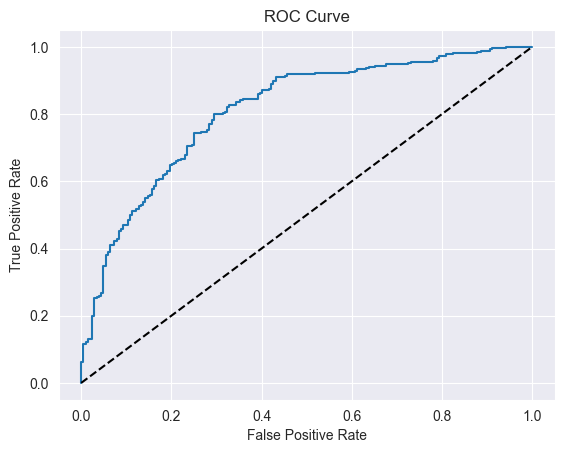

len(train_df) = 4266, len(test_df) = 474
SentimentRNN(
  (embedding): Embedding(2969, 64)
  (embedding_driv): Embedding(192, 12)
  (embedding_len): Embedding(36, 2)
  (lstm): LSTM(77, 64, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=64, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
270 204
Epoch 1
train_loss : 0.6825397619560584 val_loss : 0.6766330525279045
train_accuracy : 56.84481950304735 val_accuracy : 56.9620253164557
val_precision : 56.9620253164557
Validation loss decreased (inf --> 0.676633).  Saving model ...
184 81
Epoch 2
train_loss : 0.656842060943148 val_loss : 0.63051887601614
train_accuracy : 62.447257383966246 val_accuracy : 64.76793248945147
val_precision : 69.43396226415094
Validation loss decreased (0.676633 --> 0.630519).  Saving model ...
190 57
Epoch 3
train_loss :

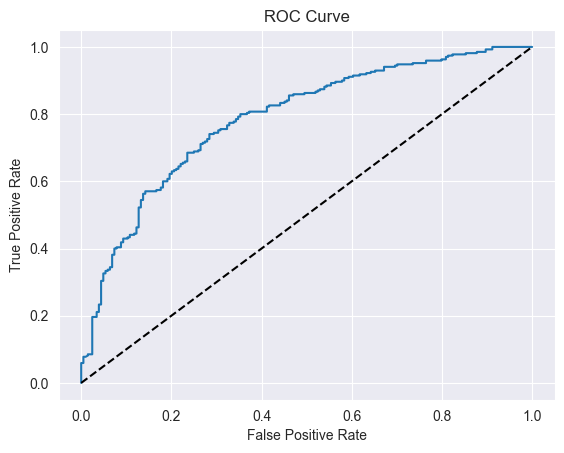

len(train_df) = 4266, len(test_df) = 474
SentimentRNN(
  (embedding): Embedding(2969, 64)
  (embedding_driv): Embedding(192, 12)
  (embedding_len): Embedding(36, 2)
  (lstm): LSTM(77, 64, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=64, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
263 181
Epoch 1
train_loss : 0.6832694224457243 val_loss : 0.6667450666427612
train_accuracy : 55.71964369432724 val_accuracy : 60.337552742616026
val_precision : 59.23423423423423
Validation loss decreased (inf --> 0.666745).  Saving model ...
213 98
Epoch 2
train_loss : 0.6471088057133689 val_loss : 0.6175063252449036
train_accuracy : 64.46319737458978 val_accuracy : 67.29957805907173
val_precision : 68.48874598070739
Validation loss decreased (0.666745 --> 0.617506).  Saving model ...
192 75
Epoch 3
train_l

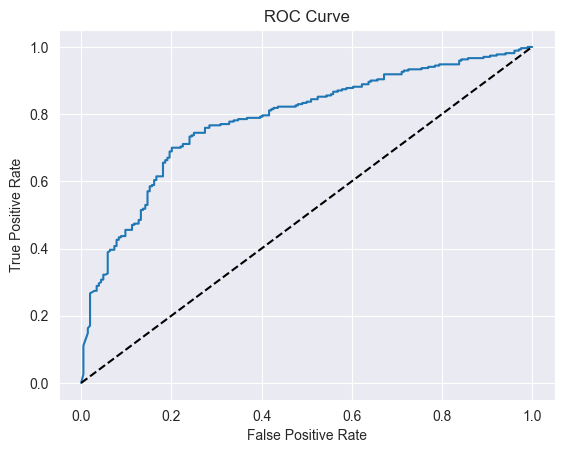

len(train_df) = 4266, len(test_df) = 474
SentimentRNN(
  (embedding): Embedding(2969, 64)
  (embedding_driv): Embedding(192, 12)
  (embedding_len): Embedding(36, 2)
  (lstm): LSTM(77, 64, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=64, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
270 204
Epoch 1
train_loss : 0.6799839699446265 val_loss : 0.6709460094571114
train_accuracy : 56.84481950304735 val_accuracy : 56.9620253164557
val_precision : 56.9620253164557
Validation loss decreased (inf --> 0.670946).  Saving model ...
241 157
Epoch 2
train_loss : 0.6436613824830126 val_loss : 0.6338420733809471
train_accuracy : 57.430848570089076 val_accuracy : 60.75949367088608
val_precision : 60.55276381909548
Validation loss decreased (0.670946 --> 0.633842).  Saving model ...
184 57
Epoch 3
train_lo

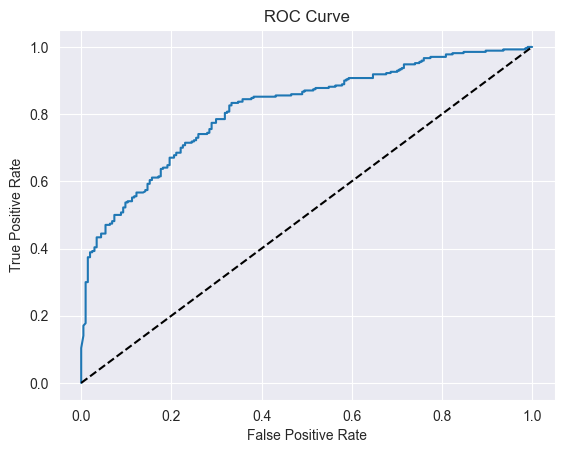

len(train_df) = 4266, len(test_df) = 474
SentimentRNN(
  (embedding): Embedding(2969, 64)
  (embedding_driv): Embedding(192, 12)
  (embedding_len): Embedding(36, 2)
  (lstm): LSTM(77, 64, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=64, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
262 184
Epoch 1
train_loss : 0.6921367502924222 val_loss : 0.6691003069281578
train_accuracy : 51.31270511017346 val_accuracy : 59.49367088607595
val_precision : 58.744394618834086
Validation loss decreased (inf --> 0.669100).  Saving model ...
209 96
Epoch 2
train_loss : 0.6588720777141515 val_loss : 0.6378460451960564
train_accuracy : 62.47069854664792 val_accuracy : 66.87763713080169
val_precision : 68.52459016393443
Validation loss decreased (0.669100 --> 0.637846).  Saving model ...
214 74
Epoch 3
train_l

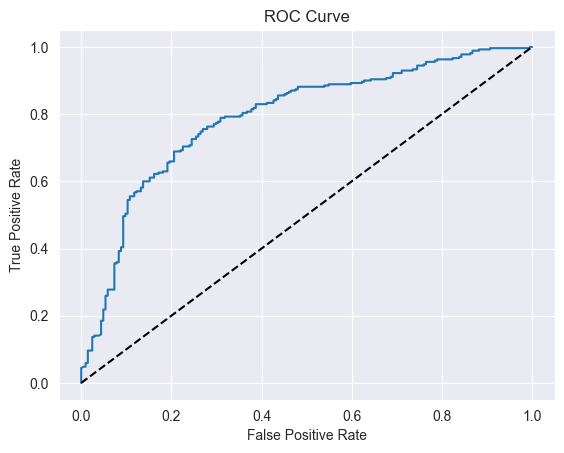

len(train_df) = 4266, len(test_df) = 474
SentimentRNN(
  (embedding): Embedding(2969, 64)
  (embedding_driv): Embedding(192, 12)
  (embedding_len): Embedding(36, 2)
  (lstm): LSTM(77, 64, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=64, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
269 205
Epoch 1
train_loss : 0.6793759901132157 val_loss : 0.6672470644116402
train_accuracy : 56.86826066572902 val_accuracy : 56.75105485232067
val_precision : 56.75105485232067
Validation loss decreased (inf --> 0.667247).  Saving model ...
216 94
Epoch 2
train_loss : 0.6429734221145288 val_loss : 0.6032164320349693
train_accuracy : 60.10314111579934 val_accuracy : 68.9873417721519
val_precision : 69.6774193548387
Validation loss decreased (0.667247 --> 0.603216).  Saving model ...
204 63
Epoch 3
train_loss

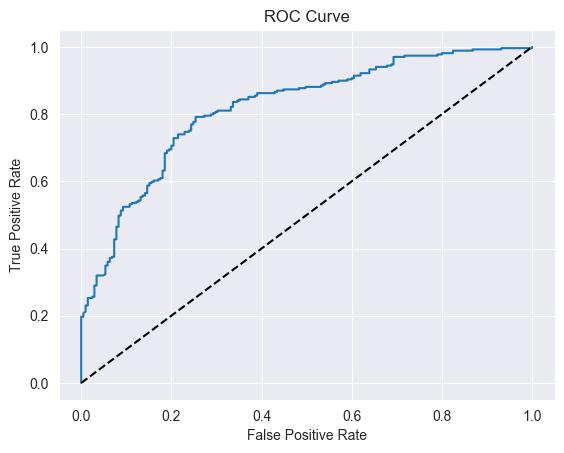

len(train_df) = 4266, len(test_df) = 474
SentimentRNN(
  (embedding): Embedding(2969, 64)
  (embedding_driv): Embedding(192, 12)
  (embedding_len): Embedding(36, 2)
  (lstm): LSTM(77, 64, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=64, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
249 172
Epoch 1
train_loss : 0.6895646719790217 val_loss : 0.6727375835180283
train_accuracy : 51.125175808720115 val_accuracy : 59.49367088607595
val_precision : 59.14489311163895
Validation loss decreased (inf --> 0.672738).  Saving model ...
216 111
Epoch 2
train_loss : 0.6429831928281642 val_loss : 0.6348876506090164
train_accuracy : 63.94749179559306 val_accuracy : 65.40084388185655
val_precision : 66.05504587155964
Validation loss decreased (0.672738 --> 0.634888).  Saving model ...
190 67
Epoch 3
train_

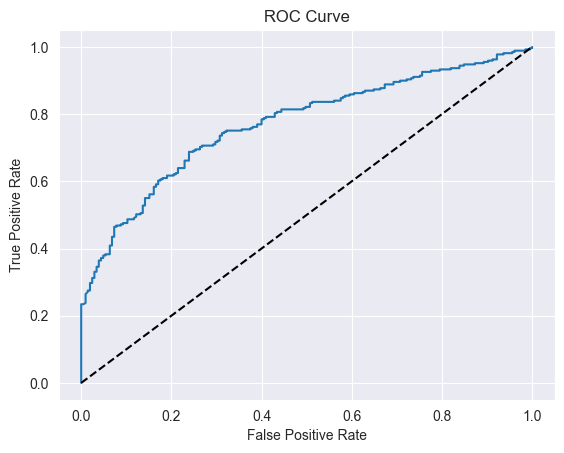

len(train_df) = 4266, len(test_df) = 474
SentimentRNN(
  (embedding): Embedding(2969, 64)
  (embedding_driv): Embedding(192, 12)
  (embedding_len): Embedding(36, 2)
  (lstm): LSTM(77, 64, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=64, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
269 205
Epoch 1
train_loss : 0.6837768465725343 val_loss : 0.674120806157589
train_accuracy : 56.86826066572902 val_accuracy : 56.75105485232067
val_precision : 56.75105485232067
Validation loss decreased (inf --> 0.674121).  Saving model ...
179 73
Epoch 2
train_loss : 0.6535496533806644 val_loss : 0.6159095987677574
train_accuracy : 61.20487576183778 val_accuracy : 65.61181434599156
val_precision : 71.03174603174604
Validation loss decreased (0.674121 --> 0.615910).  Saving model ...
182 57
Epoch 3
train_los

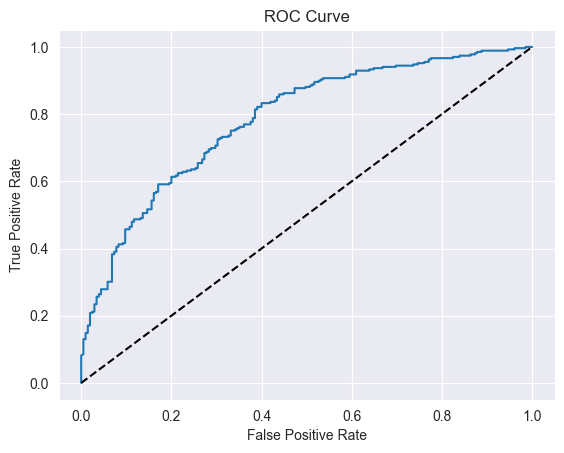

len(train_df) = 4266, len(test_df) = 474
SentimentRNN(
  (embedding): Embedding(2969, 64)
  (embedding_driv): Embedding(192, 12)
  (embedding_len): Embedding(36, 2)
  (lstm): LSTM(77, 64, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=64, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
255 169
Epoch 1
train_loss : 0.68151750226519 val_loss : 0.6737307831645012
train_accuracy : 55.06329113924051 val_accuracy : 61.39240506329114
val_precision : 60.141509433962256
Validation loss decreased (inf --> 0.673731).  Saving model ...
217 109
Epoch 2
train_loss : 0.6419895478148958 val_loss : 0.6296402141451836
train_accuracy : 64.53352086263479 val_accuracy : 66.03375527426161
val_precision : 66.56441717791411
Validation loss decreased (0.673731 --> 0.629640).  Saving model ...
212 75
Epoch 3
train_lo

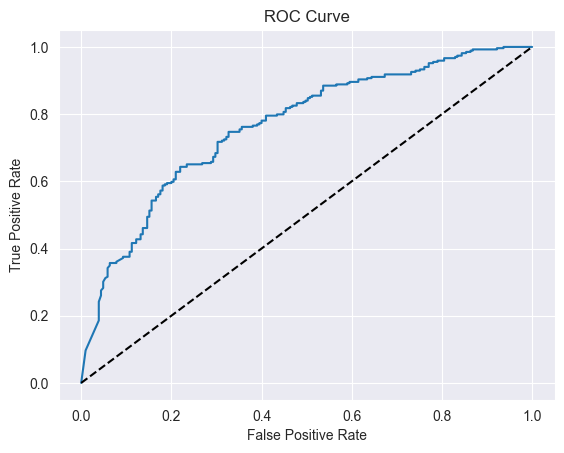

len(train_df) = 4266, len(test_df) = 474
SentimentRNN(
  (embedding): Embedding(2969, 64)
  (embedding_driv): Embedding(192, 12)
  (embedding_len): Embedding(36, 2)
  (lstm): LSTM(77, 64, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=64, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
250 169
Epoch 1
train_loss : 0.6858258798940858 val_loss : 0.6635281220078468
train_accuracy : 53.07079231129864 val_accuracy : 60.337552742616026
val_precision : 59.665871121718375
Validation loss decreased (inf --> 0.663528).  Saving model ...
204 97
Epoch 2
train_loss : 0.6267029020323682 val_loss : 0.6241378523409367
train_accuracy : 66.643225503985 val_accuracy : 65.82278481012658
val_precision : 67.77408637873754
Validation loss decreased (0.663528 --> 0.624138).  Saving model ...
194 69
Epoch 3
train_lo

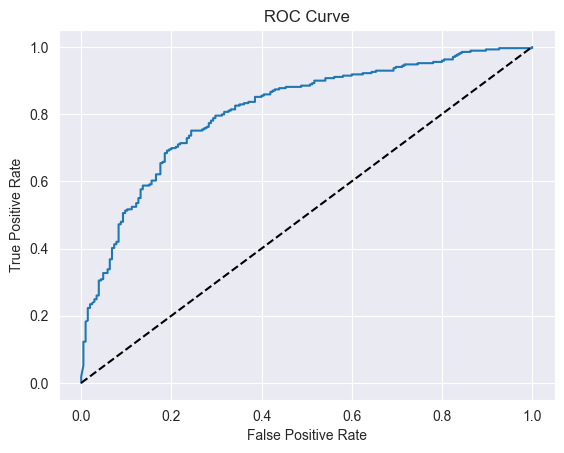

In [226]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed_value)

stats = []

FEATURE_COLUMNS = ['routes', 'driver_id_feature','experience_feature', 'len_feature']


class DataFrameDataset(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        item = {}
        for col in FEATURE_COLUMNS:
            feature = self.df[col].iloc[idx]
            if isinstance(feature, list):
                feature = padding_([feature], max_route_length)[0]
            item[col] = feature
        item['label'] = self.df['label'].iloc[idx]
        return item, item['label']

def get_data_loaders(train_df, test_df):
    # create Tensor datasets
    train_data = DataFrameDataset(train_df)
    valid_data = DataFrameDataset(test_df)

    # dataloaders
    batch_size = 64

    # make sure to SHUFFLE your data
    train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, generator=g, worker_init_fn=seed_worker)
    valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size, generator=g, worker_init_fn=seed_worker)
    return train_loader, valid_loader

shuffled_df = final_routes.sample(frac=1, random_state=42).reset_index(drop=True)

for train_index, test_index in kf.split(shuffled_df, shuffled_df['label']):
    train_df = shuffled_df.iloc[train_index]
    test_df = shuffled_df.iloc[test_index]

    train_loader, valid_loader = get_data_loaders(train_df, test_df)
    print(f'len(train_df) = {len(train_df)}, len(test_df) = {len(test_df)}')
    model = get_model()
    model.train()

    train_model((train_loader, valid_loader), model, epochs=30)
    stats.append(get_stats(model, valid_loader))

acc: 0.7339662447257383
precision: 0.7603773796532941
recall: 0.7780958281701775
f1: 0.7689001745652686
roc_auc: 0.7934646960976256
average_precision: 0.8329427332963869
quadratic_loss: 0.4913479586004172
brier_score: 0.24567397942633282


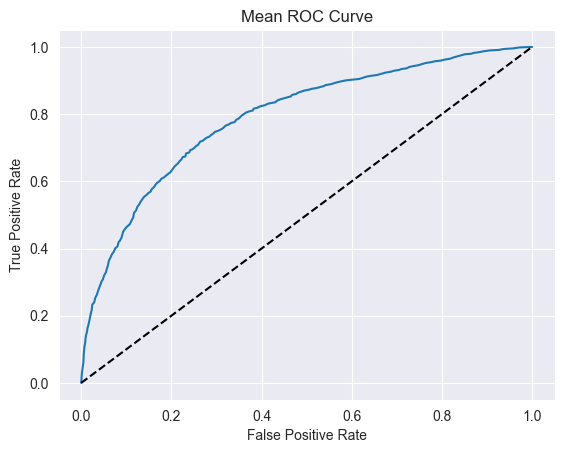

In [227]:
def get_mean_stat(stats, stat_name):
    if stat_name in ["fpr", "tpr"]:
        # Calculate mean fpr and tpr
        values = [item[stat_name] for item in stats]
        min_len = min(len(value) for value in values)
        interpolated_values = []
        for value in values:
            interpolated = np.interp(np.linspace(0, 1, min_len), np.linspace(0, 1, len(value)), value)
            interpolated_values.append(interpolated)
        mean_values = np.array(interpolated_values).mean(axis=0)
        return mean_values
    else:
        # Calculate mean for other stats
        arr = np.array([item[stat_name] for item in stats])
        return arr.mean()

print('acc:', get_mean_stat(stats, 'acc'))
print('precision:', get_mean_stat(stats, 'precision'))
print('recall:', get_mean_stat(stats, 'recall'))
print('f1:', get_mean_stat(stats, 'f1'))
print('roc_auc:', get_mean_stat(stats, 'roc_auc'))
print('average_precision:', get_mean_stat(stats, 'average_precision'))
print('quadratic_loss:', get_mean_stat(stats, 'quadratic_loss'))
print('brier_score:', get_mean_stat(stats, 'brier_score'))
mean_fpr = get_mean_stat(stats, 'fpr')
mean_tpr = get_mean_stat(stats, 'tpr')

plt.plot(mean_fpr, mean_tpr)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve')
plt.show()

In [ ]:
# from sklearn.model_selection import train_test_split
#
# reset_random()
# X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=seed_value)
# train_loader, valid_loader = get_data_loaders(X_train, y_train, X_val, y_val)
#
# model = get_model()
# # summary(model, input_size=(1,9))
# model.train()
#
# train_model((train_loader, valid_loader), model, epochs=50)
#
# get_stats(model, valid_loader)

In [ ]:
get_stats(model, valid_loader)
# def get_mean_stat(stats, stat_name) -> float:
#     return np.array([item[stat_name] for item in stats]).mean()
#
# print('acc:', get_mean_stat(stats, 'acc'))
# print('precision:', get_mean_stat(stats, 'precision'))
# print('recall:', get_mean_stat(stats, 'recall'))
# print('f1:', get_mean_stat(stats, 'f1'))
# print('roc_auc:', get_mean_stat(stats, 'roc_auc'))
# print('average_precision:', get_mean_stat(stats, 'average_precision'))

In [ ]:
print(stats)

In [ ]:
print(model.fc.weight)